# Data Preparation

Prepares the final data set(s) for modeling. The process will be as followed

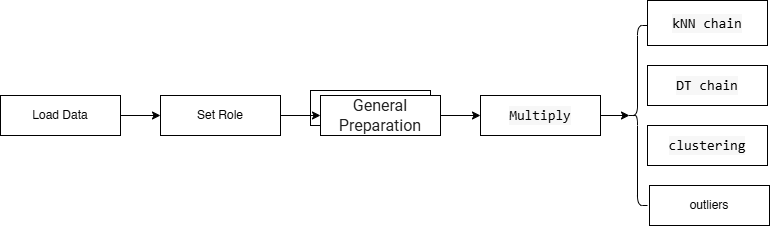

In [ ]:
import pandas as pd

# 3. General preparation

In [ ]:

df = pd.read_csv('Police_Incidents_20241025.csv',dtype="str")

df2022 = df[df['Year of Incident'] == "2022"]

#Build a map for conversion of 'Type  Location' attribute and create a new attribute 'Crime Scene'
type_location_map = {#
    'Highway, Street, Alley ETC': 'Public Roads',

    'Parking (Business)': 'Business Parking',

    'Apartment Parking Lot': 'Apartment Parking',
    'Parking Lot (All Others)': 'Apartment Parking',
    'Condominium/Townhome Parking': 'Apartment Parking',
    'Parking Lot (Park)': 'Apartment Parking',
    'Parking Lot (Apartment)': 'Apartment Parking',

    'Retail Store': 'Stores',
    'Gas or Service Station': 'Stores',
    'Convenience Store': 'Stores',
    'Grocery/Supermarket': 'Stores',
    'Shopping Mall': 'Stores',
    'Auto Dealership New/Used': 'Stores',
    'Specialty Store (In a Specific Item)': 'Stores',
    'Pharmacy': 'Stores',
    'Drug Store/Doctors Office/Hospital': 'Stores',
    'Liquor Store': 'Stores',

    'Single Family Residence - Occupied': 'Single Family Residence',
    'Single Family Residence - Vacant': 'Single Family Residence',
    'Condominium/Townhome Residence': 'Single Family Residence',
    'Condominium/Townhome Building': 'Single Family Residence',

    'Apartment Complex/Building': 'Apartment Residence',
    'Apartment Residence': 'Apartment Residence',

    'Hotel/Motel/ETC': 'Commercial Establishments',
    'Restaurant/Food Service/TABC Location': 'Commercial Establishments',
    'Business Office': 'Commercial Establishments',
    'Commercial Property Occupied/Vacant': 'Commercial Establishments',
    'Bar/NightClub/DanceHall ETC.': 'Commercial Establishments',
    'Storage Facility': 'Commercial Establishments',
    'Construction Site': 'Commercial Establishments',
    'Rental Storage Facility': 'Commercial Establishments',
    'Farm Facility': 'Commercial Establishments',
    'Government Facility': 'Commercial Establishments',
    'Medical Facility': 'Commercial Establishments',
    'Bank/Savings And Loan': 'Commercial Establishments',
    'Government/Public Building': 'Commercial Establishments',
    'Financial Institution': 'Commercial Establishments',
    'Industrial/Manufacturing': 'Commercial Establishments',
    'Personal Services': 'Commercial Establishments',
    'ATM Separate from Bank': 'Commercial Establishments',


    'Outdoor Area Public/Private': 'Public Spaces',
    'Park': 'Public Spaces',
    'Entertainment/Sports Venue': 'Public Spaces',
    'Field/Woods': 'Public Spaces',
    'Community/ Recreation Center': 'Public Spaces',
    'Arena/Stadium/Fairgrounds/Coliseum': 'Public Spaces',
    'Amusement Park': 'Public Spaces',
    'Gambling Facility/Casino/Race Track': 'Public Spaces',
    'Lake/Waterway/Beach': 'Public Spaces',
    'Camp/Campground': 'Public Spaces',
    'Rest Area': 'Public Spaces',
    'Playground': 'Public Spaces',
    'Trails': 'Public Spaces',
    'Airport - Love Field': 'Public Spaces',
    'Airport - All Others': 'Public Spaces',
    'Dock/Wharf/Freight/Modal Terminal': 'Public Spaces',
    'Church/Synagogue/Temple/Mosque': 'Public Spaces',
    'Religious Institution': 'Public Spaces',
    'Shelter - Mission/Homeless': 'Public Spaces',
    'School - Elementary/Secondary': 'Public Spaces',
    'School - College/University': 'Public Spaces',
    'Daycare Facility': 'Public Spaces',
    'School/College': 'Public Spaces',
    'School/Daycare': 'Public Spaces',


    'Other': 'Misc',
    'Cyberspace': 'Misc',
    'Jail/Prison/Penitentiary/Corrections Fac': 'Misc',
    'Military Installation': 'Misc',
    'Tribal Lands': 'Misc',
    'Abandoned/Condemned Structure': 'Misc',
    }

columns_to_keep = [
    "Type  Location", "Division", "Date1 of Occurrence", "Time1 of Occurrence",
    "CFS Number", "Victim Race", "Victim Gender", "UCR Disposition",
    "NIBRS Group", "X Coordinate", "Y Cordinate", "Zip Code"
]

df2022columns = df2022[columns_to_keep]

#create a new attribute 'Crime Scene', mapped to the new values from Type Location and dropping any NaN Values.
#Dropping 'Type Location' column cos 'Crime Scene' is created.
df2022columns['Crime Scene'] = df2022columns['Type  Location'].map(type_location_map)
df2022columns.drop('Type  Location', axis=1, inplace=True)

# Standardize the Division column to Lower case
df2022columns['Division'] = df2022columns['Division'].str.lower()

#Dropping rows only in 'Division' and 'Crime Scene' column that have any NaN values
df2022columns.dropna(subset=['Crime Scene', 'Division'], inplace=True)


df2022columns['Victim Race'] = df2022columns['Victim Race'].fillna('Unknown')

df2022columns['Victim Race'] = df2022columns['Victim Race'].replace(['NH', 'H'], 'Unknown')
df2022columns['Victim Race'] = df2022columns['Victim Race'].replace(
    ['American Indian or Alaska Native', 'Native Hawaiian/Pacific Islander'],
    'American Native'
)


# Precompute value counts and store them in a dictionary
value_counts = df2022columns['CFS Number'].value_counts().to_dict()

# Define a faster categorization function using the dictionary
def categorize_cfs(cfs):
    if pd.isnull(cfs):
        return 'unknown'
    elif value_counts.get(cfs, 0) > 1:  # Use dictionary lookup
        return 'multiple'
    else:
        return 'single'

# Apply categorization using the optimized function
df2022columns['Crime Category'] = df2022columns['CFS Number'].apply(categorize_cfs)


df2022columns.drop('CFS Number', axis=1, inplace=True)


df2022columns['Zip Code'] = df2022columns['Zip Code'].fillna(00000)

df2022columns['Zip Code'] = df2022columns['Zip Code'].astype(int)


# Define the groups
groups = {
    'Downtown/Central Dallas': [
        75201, 75202, 75204, 75219, 75226, 75246, 75255, 75258, 75260, 75379
    ],
    'North Dallas': [
        75205, 75209, 75220, 75225, 75229, 75230, 75231, 75240, 75243,
        75244, 75248, 75251, 75252, 75254, 75287
    ],
    'South Dallas': [
        75203, 75210, 75215, 75216, 75217, 75224, 75232, 75233,
        75237, 75241, 75249, 75253
    ],
    'East Dallas': [
        75206, 75214, 75218, 75223, 75227, 75228, 75238
    ],
    'West Dallas': [
        75207, 75208, 75211, 75212, 75234, 75235, 75236, 75247
    ],
    'Suburb': [
        75006, 75007, 75019, 75021, 75023, 75024, 75033, 75039,
        75040, 75041, 75042, 75043, 75044, 75050, 75051, 75052,
        75060, 75061, 75062, 75063, 75074, 75080, 75081, 75087,
        75088, 75089, 75093, 75104, 75115, 75116, 75126, 75134,
        75137, 75146, 75149, 75150, 75159, 75180, 75181, 75261,
        76092, 76201, 76208
    ],
    'Outside Dallas Metro Area': [
        40517, 74701, 75111, 79745, 91803
    ],
    'Unknown': [
        00000
    ]
}

# Create the mapping dictionary using dictionary comprehension
zip_to_group = {z: group for group, zips in groups.items() for z in zips}

# Map the zip codes to their groups
df2022columns['Area Zone'] = df2022columns['Zip Code'].map(zip_to_group)

df2022columns.drop('Zip Code', axis=1, inplace=True)



df2022columns['Victim Gender'] = df2022columns['Victim Gender'].fillna('Unknown')

df2022columns['UCR Disposition'] = df2022columns['UCR Disposition'].fillna('Unknown')

df2022columns['UCR Disposition'] = df2022columns['UCR Disposition'].replace({
    'CBA (Over Age 17)': 'CBA',
    'CBA (Age 17)': 'CBA',
    'CBA (Under 17)': 'CBA',
    'CBEA (Over Age 17)': 'CBA',
    'CBEA (Age 17)': 'CBA',
    'CBEA (Under Age 17)': 'CBA'
})

df2022columns['NIBRS Group'] = df2022columns['NIBRS Group'].fillna('A')

df2022columns['NIBRS Group'] = df2022columns['NIBRS Group'].replace({'999 - No Coded': 'C'})

# List of columns to convert to 'category'
columns_to_convert = ['Crime Scene', 'Division', 'Victim Race', 'Victim Gender', 'UCR Disposition', 'NIBRS Group', 'Crime Category', 'Area Zone']

# Convert the specified columns to 'category'
df2022columns[columns_to_convert] = df2022columns[columns_to_convert].astype('category')

# Combine the date and time columns into a single datetime column
df2022columns['Datetime of Occurrence'] = pd.to_datetime(
    df2022columns['Date1 of Occurrence'].astype(str) + ' ' + df2022columns['Time1 of Occurrence'].astype(str)
)

df2022columns.drop('Date1 of Occurrence', axis=1, inplace=True)
df2022columns.drop('Time1 of Occurrence', axis=1, inplace=True)


df2022columns['X Coordinate'] = df2022columns['X Coordinate'].fillna('0')

df2022columns = df2022columns.rename(columns={"Y Cordinate": "Y Coordinate"})

df2022columns['Y Coordinate'] = df2022columns['Y Coordinate'].fillna('0')

df_ready = df2022columns.sample(n=10000, random_state=1945)

#df_ready.to_csv('Prepped Data.csv', index=False)

#sampled_df.to_csv('Prepped Data.csv', index=False)

print("VOILA!")

<ipython-input-2-4764996b4194>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022columns['Crime Scene'] = df2022columns['Type  Location'].map(type_location_map)
<ipython-input-2-4764996b4194>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022columns.drop('Type  Location', axis=1, inplace=True)
<ipython-input-2-4764996b4194>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

VOILA!


<ipython-input-2-4764996b4194>:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022columns['Datetime of Occurrence'] = pd.to_datetime(
<ipython-input-2-4764996b4194>:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022columns.drop('Date1 of Occurrence', axis=1, inplace=True)
<ipython-input-2-4764996b4194>:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022columns.

NOTE: After this step, please use `df_ready` for each of your work.

Sample:

```python
your_df = copy.deepcopy(df_ready)
```

## 4. Prepare data for Decision Tree

In [ ]:
import pandas as pd #pandas library
import numpy as np #numpy library

import matplotlib.pyplot as plt # data visualization
%matplotlib inline


import seaborn as sns # statistical data visualization
import pyproj
from pyproj import Proj, transform #Convert Coordinates

from sklearn.preprocessing import OneHotEncoder #One hot encoding for categorical attributes
from sklearn.model_selection import train_test_split #Used to split dataset into train and test data

from sklearn.tree import DecisionTreeClassifier #Imports Decision Tree Classifier
from sklearn.tree import plot_tree

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote
import sklearn.metrics as metrics #performance metrics
from sklearn.metrics import accuracy_score #Accuracy classification score
from sklearn.metrics import confusion_matrix #confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import classification_report #Build a text report showing the main classification metrics.


from scipy import stats
import copy

### 4.1 kNN and Random Forest data preparation (Suvitha)

In [ ]:
df_prepped_data = copy.deepcopy(df_ready)
df_prepped_data.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,X Coordinate,Y Coordinate,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence
1234588,south central,Unknown,Unknown,CBA,B,2479959.14839,6939943.77169,Misc,single,South Dallas,2022-04-01 18:30:00
355678,central,Hispanic or Latino,Female,Suspended,A,2505551.49714,6974575.85564,Business Parking,multiple,East Dallas,2022-01-08 19:00:00
339328,southwest,Hispanic or Latino,Female,CBA,A,2479376.06393,6970723.56249,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00
1191069,southwest,Black,Female,Suspended,C,2473848.26986,6938343.13152,Apartment Residence,single,South Dallas,2022-10-14 12:00:00
175324,northwest,Unknown,Unknown,Suspended,A,2462311.80212,7011197.57833,Stores,multiple,North Dallas,2022-04-19 12:00:00


In [ ]:
df_prepped_data['Date'] = pd.to_datetime(df_prepped_data['Datetime of Occurrence'])
df_prepped_data['Month'] = df_prepped_data['Date'].dt.month
df_prepped_data['DayOfWeek'] = df_prepped_data['Date'].dt.dayofweek
#df['WeekOfYear'] = df['Date'].dt.isocalendar().week
#df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)
df_prepped_data['Date'] = pd.to_datetime(df_prepped_data['Date'])

# Extract the hour from the datetime column
df_prepped_data['Hour'] = df_prepped_data['Date'].dt.hour

# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'TimeOfDay'
df_prepped_data['TimeOfDay'] = df_prepped_data['Hour'].apply(categorize_time_of_day)

df_prepped_data.head()


,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,X Coordinate,Y Coordinate,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence,Date,Month,DayOfWeek,Hour,TimeOfDay
1234588,south central,Unknown,Unknown,CBA,B,2479959.14839,6939943.77169,Misc,single,South Dallas,2022-04-01 18:30:00,2022-04-01 18:30:00,4,4,18,Evening
355678,central,Hispanic or Latino,Female,Suspended,A,2505551.49714,6974575.85564,Business Parking,multiple,East Dallas,2022-01-08 19:00:00,2022-01-08 19:00:00,1,5,19,Evening
339328,southwest,Hispanic or Latino,Female,CBA,A,2479376.06393,6970723.56249,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00,2022-11-22 22:40:00,11,1,22,Night
1191069,southwest,Black,Female,Suspended,C,2473848.26986,6938343.13152,Apartment Residence,single,South Dallas,2022-10-14 12:00:00,2022-10-14 12:00:00,10,4,12,Afternoon
175324,northwest,Unknown,Unknown,Suspended,A,2462311.80212,7011197.57833,Stores,multiple,North Dallas,2022-04-19 12:00:00,2022-04-19 12:00:00,4,1,12,Afternoon


In [ ]:
y_classf = df_prepped_data['NIBRS Group'] # Target Variable

In [ ]:
# Drop columns
df_prepped_data.drop(columns=['X Coordinate', 'Y Coordinate', 'Datetime of Occurrence', 'Date', 'Hour' ], inplace=True)
X = df_prepped_data.drop('NIBRS Group', axis=1)
X.head()

,Division,Victim Race,Victim Gender,UCR Disposition,Crime Scene,Crime Category,Area Zone,Month,DayOfWeek,TimeOfDay
1234588,south central,Unknown,Unknown,CBA,Misc,single,South Dallas,4,4,Evening
355678,central,Hispanic or Latino,Female,Suspended,Business Parking,multiple,East Dallas,1,5,Evening
339328,southwest,Hispanic or Latino,Female,CBA,Public Spaces,multiple,West Dallas,11,1,Night
1191069,southwest,Black,Female,Suspended,Apartment Residence,single,South Dallas,10,4,Afternoon
175324,northwest,Unknown,Unknown,Suspended,Stores,multiple,North Dallas,4,1,Afternoon


In [ ]:
#one-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_classfication_encoded = encoder.fit_transform(X)


array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
# create the column names for the one-hot encoded categorical features- Suvitha
categorical_cols = [f'{col}_{cat}' for i, col in enumerate(X.columns)
                       for cat in encoder.categories_[i]]

['Division_central',
 'Division_north central',
 'Division_northeast',
 'Division_northwest',
 'Division_south central',
 'Division_southeast',
 'Division_southwest',
 'Victim Race_American Native',
 'Victim Race_Asian',
 'Victim Race_Black',
 'Victim Race_Hispanic or Latino',
 'Victim Race_Middle Eastern',
 'Victim Race_Unknown',
 'Victim Race_White',
 'Victim Gender_Female',
 'Victim Gender_Male',
 'Victim Gender_Unknown',
 'UCR Disposition_CBA',
 'UCR Disposition_Closed',
 'UCR Disposition_Open',
 'UCR Disposition_Suspended',
 'UCR Disposition_Unknown',
 'Crime Scene_Apartment Parking',
 'Crime Scene_Apartment Residence',
 'Crime Scene_Business Parking',
 'Crime Scene_Commercial Establishments',
 'Crime Scene_Misc',
 'Crime Scene_Public Roads',
 'Crime Scene_Public Spaces',
 'Crime Scene_Single Family Residence',
 'Crime Scene_Stores',
 'Crime Category_multiple',
 'Crime Category_single',
 'Crime Category_unknown',
 'Area Zone_Downtown/Central Dallas',
 'Area Zone_East Dallas',
 'Ar

In [ ]:
#Splitting the dataset into train(70%) and test(30%)
random_seed = 808
X_train, X_test, y_train, y_test = train_test_split(df_classfication_encoded, y_classf, test_size=0.3, random_state=random_seed)

## 4.1 Decision Tree (David)

In [ ]:
dt_model_3 = DecisionTreeClassifier(max_depth=3, random_state=808)
dt_model_3.fit(X_train, y_train)
y_pred_3 = dt_model_3.predict(X_test)

In [ ]:
# Print accuracy
print("Accuracy with a max depth of 3:", accuracy_score(y_test, y_pred_3))

Accuracy with a max depth of 3: 0.7543333333333333


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=808)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
# Print accuracy
print("Accuracy with a max depth of 4:", accuracy_score(y_test, y_pred_dt))

Accuracy with a max depth of 4: 0.767


In [ ]:
#DT Classification report
print("DT Classification report")
print(classification_report(y_test, y_pred_dt))

DT Classification report
              precision    recall  f1-score   support

           A       0.80      0.87      0.83      2075
           B       0.71      0.35      0.46       223
           C       0.55      0.50      0.52       702

    accuracy                           0.74      3000
   macro avg       0.68      0.57      0.61      3000
weighted avg       0.73      0.74      0.73      3000



['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']


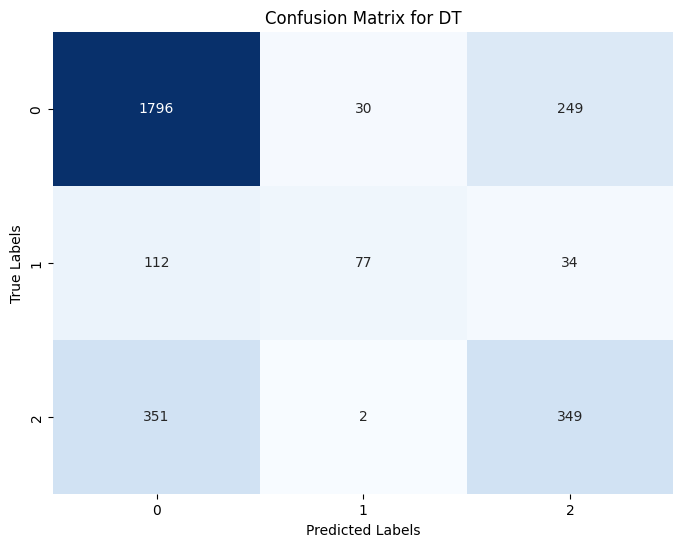

In [ ]:
# Generate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(y_classf.unique())
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for DT")
plt.show()

['B', 'A', 'C']
Categories (3, object): ['A', 'B', 'C']
['A' 'B' 'C']
Feature names: Index(['Division', 'Victim Race', 'Victim Gender', 'UCR Disposition',
       'Crime Scene', 'Crime Category', 'Area Zone', 'Month', 'DayOfWeek',
       'TimeOfDay'],
      dtype='object')


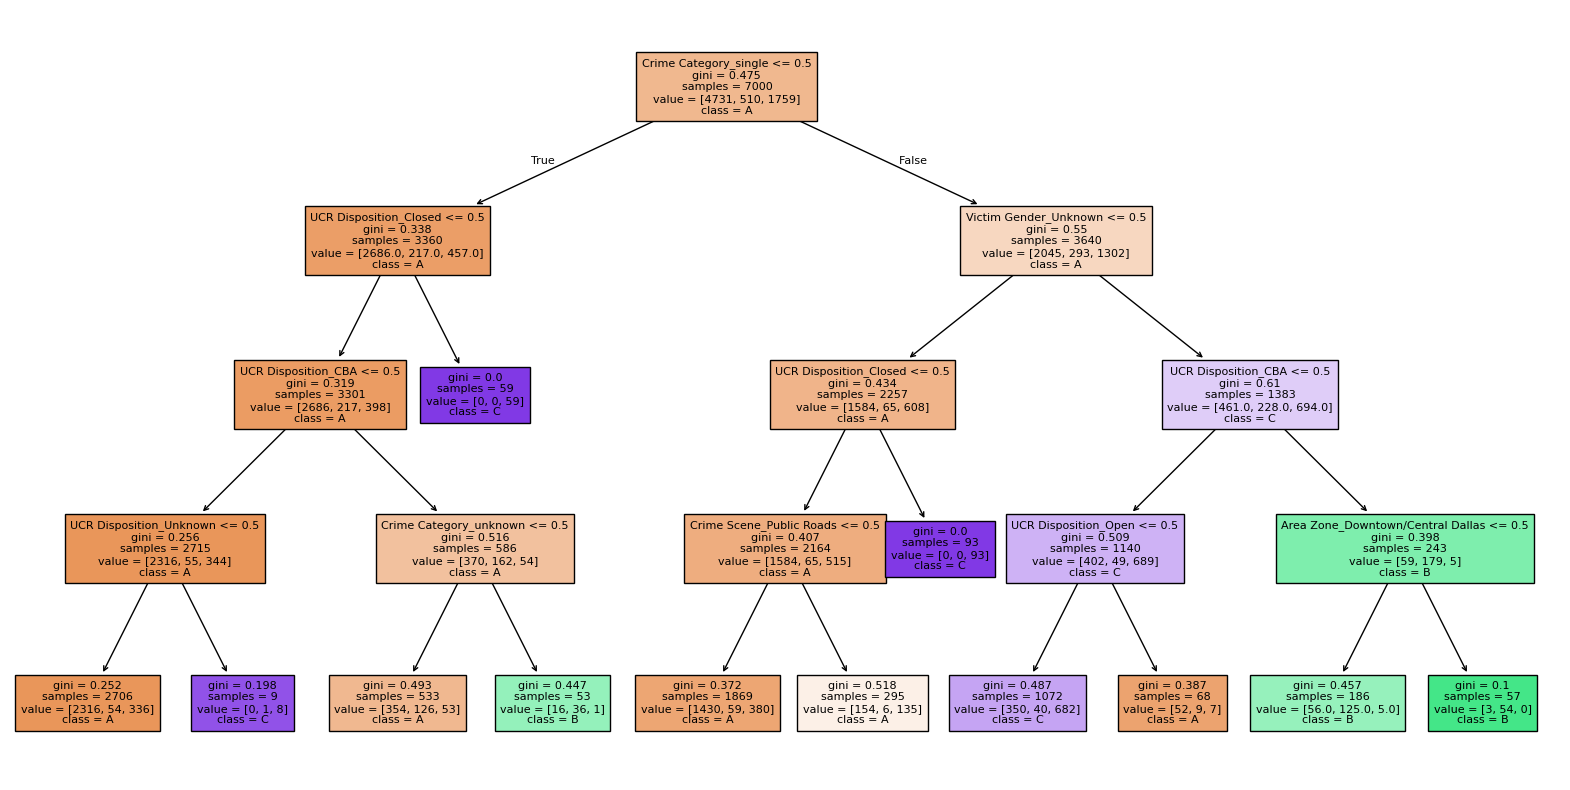

In [ ]:
# Plot Decision Tree
print(y_classf.unique())
print(dt_model.classes_)
print("Feature names:", X.columns)
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=encoder.get_feature_names_out(), class_names=dt_model.classes_, fontsize=8)
plt.show()

## 4.2 kNN (Suvitha)

In [ ]:
#Initially K neighbours

Neighbours = 30

error_rate = []

for i in range(1, Neighbours):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)

    #compares two arrays, y_pred and y1_test, element-wise. It returns an array of True and False.
    # np.mean function calculates the mean of the proportion of incorrect predictions.
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

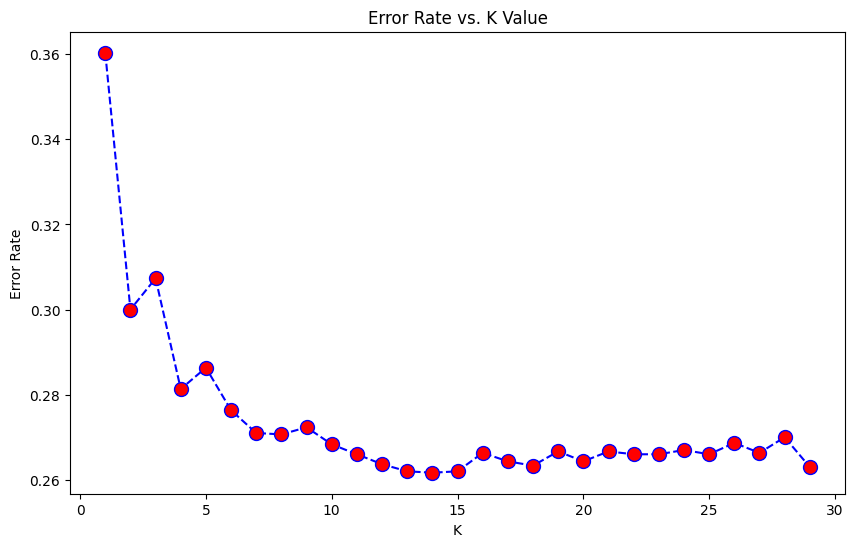

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,Neighbours), error_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor= 'red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# with K=14, since the error rate is the lowest at K

K = 14

kNN = KNeighborsClassifier(n_neighbors = K)

kNN.fit(X_train,y_train)
y_pred=kNN.predict(X_test)

In [ ]:
# Accuracy on the training data
train_accuracy = kNN.score(X_train, y_train)

# Accuracy on the test data
test_accuracy = kNN.score(X_test, y_test)

# Print the results
print(f"KNN Model Accuracy for Training Data: {train_accuracy:.2f}")
print(f"KNN Model Accuracy for Test Data: {test_accuracy:.2f}")


KNN Model Accuracy for Training Data: 0.76
KNN Model Accuracy for Test Data: 0.74


In [ ]:
print("Model Accuracy for KNN:",round(accuracy_score(y_test, y_pred), 2))

Model Accuracy for KNN: 0.74


In [ ]:
#KNN Classification report
print("KNN Classification report")
print(classification_report(y_test, y_pred))

KNN Classification report
              precision    recall  f1-score   support

           A       0.77      0.91      0.83      2075
           B       0.65      0.30      0.41       223
           C       0.59      0.36      0.45       702

    accuracy                           0.74      3000
   macro avg       0.67      0.53      0.56      3000
weighted avg       0.72      0.74      0.71      3000



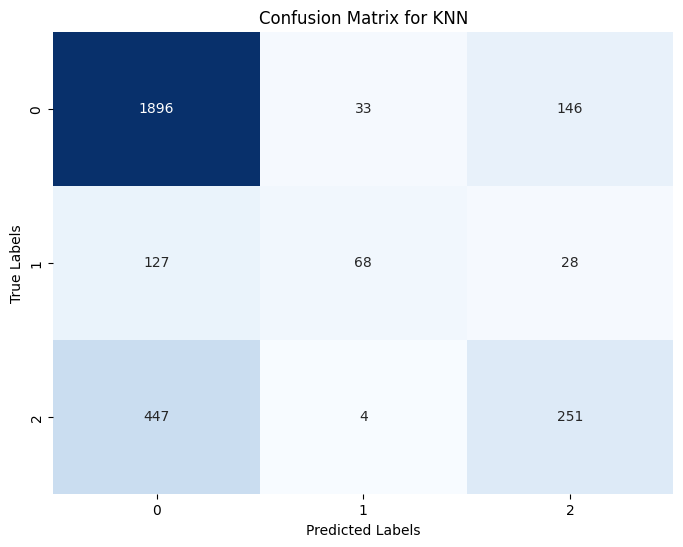

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN")
plt.show()

## 4.3 RandomForest - Suvitha

In [ ]:
#Random Forest Classifier model with parameter n_estimators=10

rfc_10 = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model to the training set
rfc_10.fit(X_train, y_train)

# Predict on the test set results
y_pred_10 = rfc_10.predict(X_test)

# Check accuracy score, accuracy increases with number of decision-trees in the model.
print("Model accuracy score with 10 decision-trees :", round(accuracy_score(y_test, y_pred_10), 3))

Model accuracy score with 10 decision-trees : 0.735


In [ ]:
#Random Forest Classifier model with parameter n_estimators=200

rfc_200 = RandomForestClassifier(max_depth= 70, max_features= "sqrt", min_samples_leaf= 4, min_samples_split=10, n_estimators=200, random_state=0)

# fit the model to the training set
rfc_200.fit(X_train, y_train)

# Predict on the test set results
y_pred_200 = rfc_200.predict(X_test)

# Check accuracy score, accuracy increases with number of decision-trees in the model.
print("Model accuracy score with 200 decision-trees :", round(accuracy_score(y_test, y_pred_200), 3))

Model accuracy score with 200 decision-trees : 0.765


In [ ]:
#Confusion matrix

# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_200)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1914   30  131]
 [ 118   80   25]
 [ 400    2  300]]


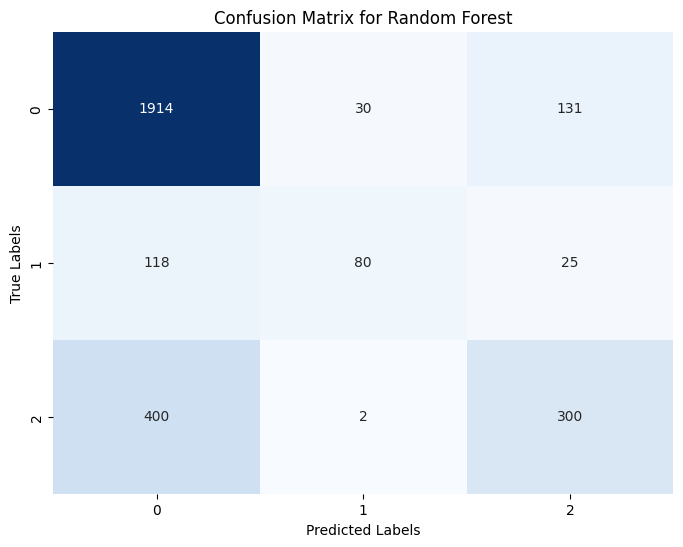

In [ ]:
# Generate the confusion matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_200)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
#Random Forest Classification report
print("Random Forest Classification report")
print(classification_report(y_test, y_pred_200))

Random Forest Classification report
              precision    recall  f1-score   support

           A       0.79      0.92      0.85      2075
           B       0.71      0.36      0.48       223
           C       0.66      0.43      0.52       702

    accuracy                           0.76      3000
   macro avg       0.72      0.57      0.62      3000
weighted avg       0.75      0.76      0.74      3000



In [ ]:
# Assuming feature_importances is already computed
importances = rfc_200.feature_importances_

feature_names = categorical_cols

# Create an index array for feature names
#feature_names = np.arange(X_train.shape[1])  # Indices of features

# Create a DataFrame for sorting and plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the importance DataFrame
print(importance_df)

#importance_df.to_csv('feature_importance.csv', index=False)

## 5. Prepare data for distance-base model

## 6. Clustering






A set of Elbow and Cluster graphs will be displayed in this part of the code. 

In order to keep going, each pop-up window will have to be closed.

Press Enter to proceed...


<ipython-input-5-b32e39f985eb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusterdf['Datetime of Occurrence'] = clusterdf['Datetime of Occurrence'].apply(lambda x: x.timestamp())
<ipython-input-5-b32e39f985eb>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusterdf[P], unique_categories = pd.factorize(clusterdf[P])
<ipython-input-5-b32e39f985eb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Victim Race Map:
    Code            Category
0     0               Black
1     1  Hispanic or Latino
2     2             Unknown
3     3               White
4     4      Middle Eastern
5     5               Asian
6     6     American Native
Victim Gender Map:
    Code Category
0     0   Female
1     1     Male
2     2  Unknown


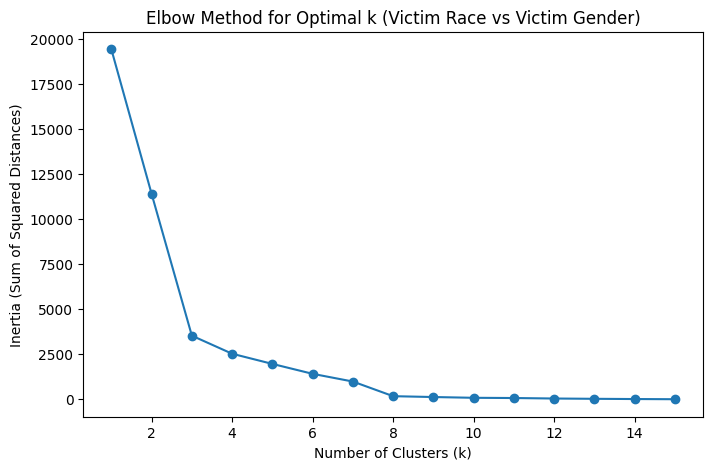

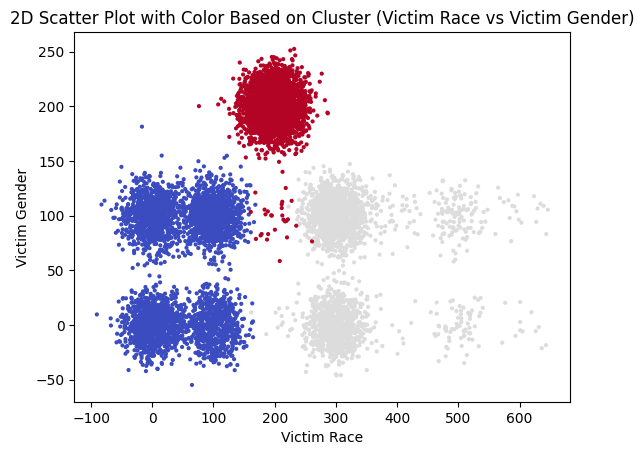

Crime Scene Map:
    Code                   Category
0     0               Public Roads
1     1  Commercial Establishments
2     2              Public Spaces
3     3        Apartment Residence
4     4           Business Parking
5     5                     Stores
6     6          Apartment Parking
7     7    Single Family Residence
8     8                       Misc
Division Map:
    Code       Category
0     0      southwest
1     1      southeast
2     2      northeast
3     3        central
4     4      northwest
5     5  south central
6     6  north central


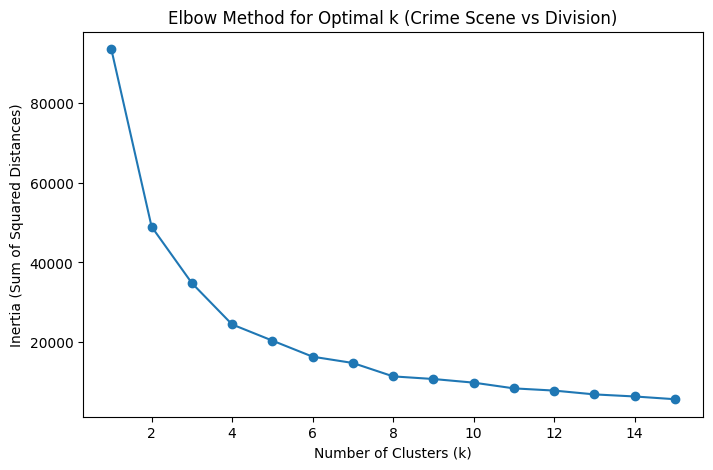

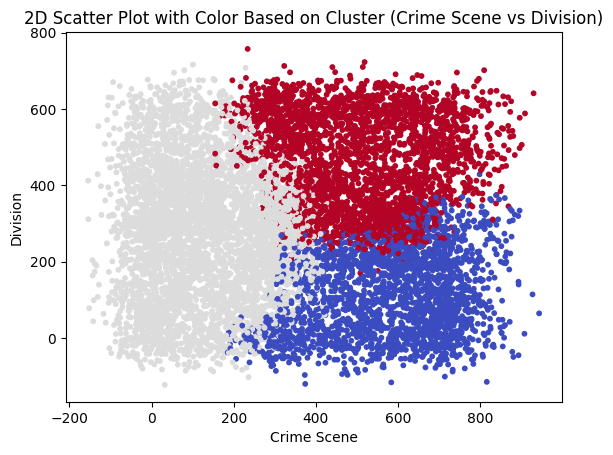

Area Zone Map:
    Code                 Category
0     0              West Dallas
1     1              East Dallas
2     2             South Dallas
3     3             North Dallas
4     4  Downtown/Central Dallas
5     5                   Suburb
6     6                  Unknown


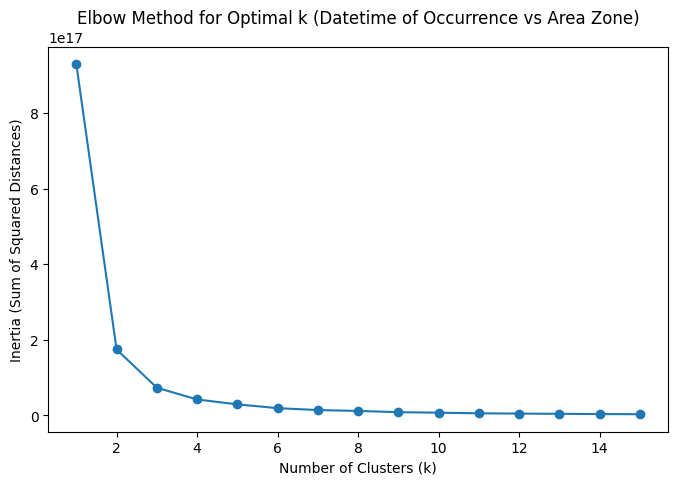

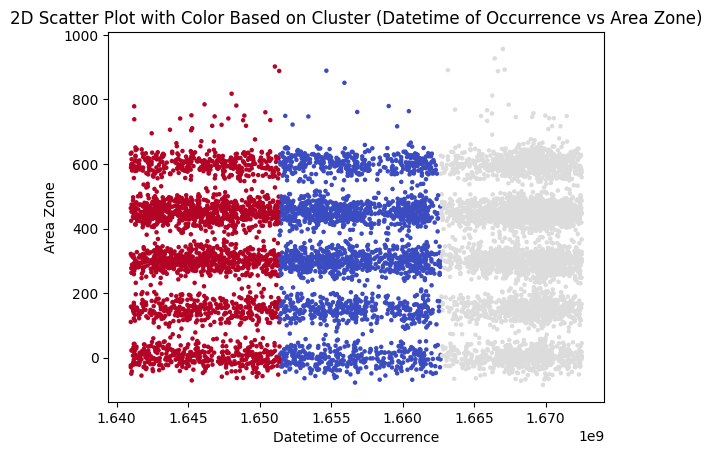

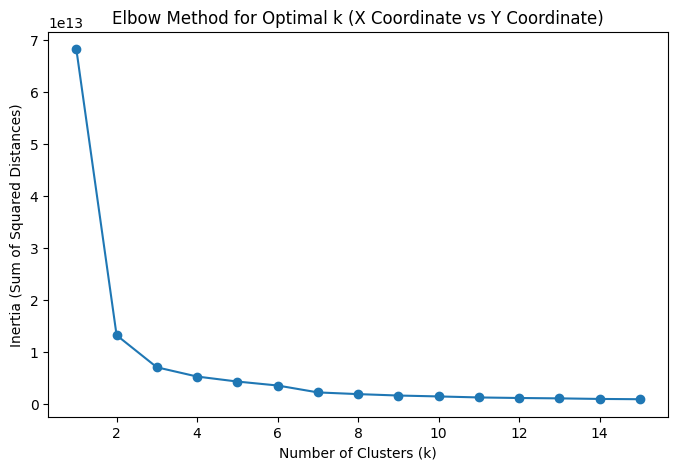

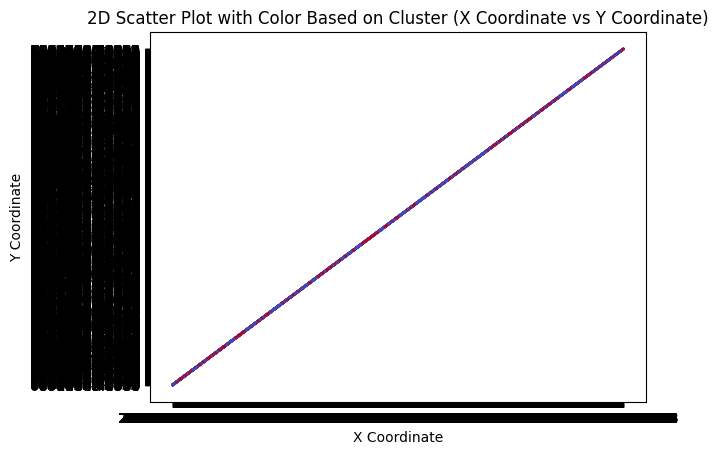

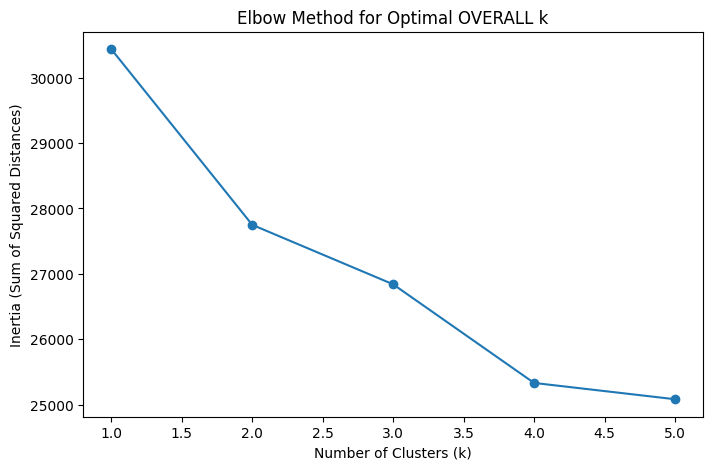

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

clusterdf = copy.deepcopy(df_ready)


input("\n\n\n\n\nA set of Elbow and Cluster graphs will be displayed in this part of the code. \n\nIn order to keep going, each pop-up window will have to be closed.\n\nPress Enter to proceed...")


#Data outside of the Date of occurrence is filtered
clusterdf = clusterdf[clusterdf['Datetime of Occurrence'].apply(lambda x: x.year) == 2022]

#Date time of Occurrence is transformed to timestamp
clusterdf['Datetime of Occurrence'] = clusterdf['Datetime of Occurrence'].apply(lambda x: x.timestamp())



########################## Victim Race and Gender ########################################################################

P = 'Victim Race'
Q = 'Victim Gender'
k_values = range(1, 16)
jitter = 20
clustersNumber = 3
dotSize = 4
#Categorical / Numerical
dataType = "Categorical"

# Race and Gender are mapped to numerical values
if dataType == "Categorical":
    clusterdf[P], unique_categories = pd.factorize(clusterdf[P])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    pMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    clusterdf[Q], unique_categories = pd.factorize(clusterdf[Q])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    qMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    print(f"{P} Map:\n {pMap}")
    print(f"{Q} Map:\n {qMap}")

#Elbow Method graph is generated
combined = clusterdf[[P, Q]]
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1810)
    kmeans.fit(combined)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k (' + P + ' vs ' +Q + ')')
plt.show()


# Cluster graph is generated
kmeans = KMeans(n_clusters=clustersNumber, random_state=1810)
clusterdf['combined_cluster'] = kmeans.fit_predict(clusterdf[[P,Q]])

if dataType == "Categorical":
    clusterdf[P] = clusterdf[P]*100 + np.random.normal(0, jitter * clusterdf[P].std(), clusterdf[P].shape)
    clusterdf[Q] = clusterdf[Q]*100 + np.random.normal(0, jitter * clusterdf[Q].std(), clusterdf[Q].shape)

plt.scatter(clusterdf[P], clusterdf[Q], c=clusterdf['combined_cluster'], cmap='coolwarm', s=dotSize)

plt.xlabel(P)
plt.ylabel(Q)
plt.title('2D Scatter Plot with Color Based on Cluster (' + P + ' vs ' +Q + ')')
plt.show()



########################## Crime Scene & Division ########################################################################

P = 'Crime Scene'
Q = 'Division'
k_values = range(1, 16)
jitter = 20
clustersNumber = 3
dotSize = 10
#Categorical / Numerical
dataType = "Categorical"


# Crime Scene and Division are mapped to numerical values
if dataType == "Categorical":
    clusterdf[P], unique_categories = pd.factorize(clusterdf[P])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    pMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    clusterdf[Q], unique_categories = pd.factorize(clusterdf[Q])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    qMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    print(f"{P} Map:\n {pMap}")
    print(f"{Q} Map:\n {qMap}")


#Elbow Method graph is generated
combined = clusterdf[[P, Q]]
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1810)
    kmeans.fit(combined)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k (' + P + ' vs ' +Q + ')')
plt.show()


# Cluster graph is generated
kmeans = KMeans(n_clusters=clustersNumber, random_state=1810)
clusterdf['combined_cluster'] = kmeans.fit_predict(clusterdf[[P,Q]])

if dataType == "Categorical":
    clusterdf[P] = clusterdf[P]*100 + np.random.normal(0, jitter * clusterdf[P].std(), clusterdf[P].shape)
    clusterdf[Q] = clusterdf[Q]*100 + np.random.normal(0, jitter * clusterdf[Q].std(), clusterdf[Q].shape)

plt.scatter(clusterdf[P], clusterdf[Q], c=clusterdf['combined_cluster'], cmap='coolwarm', s=dotSize)

plt.xlabel(P)
plt.ylabel(Q)
plt.title('2D Scatter Plot with Color Based on Cluster (' + P + ' vs ' +Q + ')')
plt.show()



########################## Datetime of Occurrence & Area Zone ########################################################################

P = 'Datetime of Occurrence' #Numerical
Q = 'Area Zone'  #Categorical
k_values = range(1, 16)
jitter = 20
clustersNumber = 3
dotSize = 5
#Categorical / Numerical
dataType = "Categorical"

# Area Zone is mapped to numerical values
if dataType == "Categorical":

    clusterdf[Q], unique_categories = pd.factorize(clusterdf[Q])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    qMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    print(f"{Q} Map:\n {qMap}")



#Elbow Method graph is generated
combined = clusterdf[[P, Q]]
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1810)
    kmeans.fit(combined)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k (' + P + ' vs ' +Q + ')')
plt.show()


# Cluster graph is generated
kmeans = KMeans(n_clusters=clustersNumber, random_state=1810)
clusterdf['combined_cluster'] = kmeans.fit_predict(clusterdf[[P,Q]])

if dataType == "Categorical":
    clusterdf[Q] = clusterdf[Q]*150 + np.random.normal(0, jitter * clusterdf[Q].std(), clusterdf[Q].shape)



plt.scatter(clusterdf[P], clusterdf[Q], c=clusterdf['combined_cluster'], cmap='coolwarm', s=dotSize)



plt.xlabel(P)
plt.ylabel(Q)
plt.title('2D Scatter Plot with Color Based on Cluster (' + P + ' vs ' +Q + ')')
plt.show()



########################## X & Y Coordinates ########################################################################

P = 'X Coordinate'
Q = 'Y Coordinate'
k_values = range(1, 16)
jitter = 20
clustersNumber = 3
dotSize = 1
#Categorical / Numerical
dataType = "Numerical"

# Numerical data is not mapped
if dataType == "Categorical":
    clusterdf[P], unique_categories = pd.factorize(clusterdf[P])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    pMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    clusterdf[Q], unique_categories = pd.factorize(clusterdf[Q])
    mapping = {i: category for i, category in enumerate(unique_categories)}
    qMap = pd.DataFrame(list(mapping.items()), columns=['Code', 'Category'])

    print(f"{P} Map:\n {pMap}")
    print(f"{Q} Map:\n {qMap}")



#Elbow Method graph is generated
combined = clusterdf[[P, Q]]
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1810)
    kmeans.fit(combined)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k (' + P + ' vs ' +Q + ')')
plt.show()


# Cluster graph is generated
kmeans = KMeans(n_clusters=clustersNumber, random_state=1810)
clusterdf['combined_cluster'] = kmeans.fit_predict(clusterdf[[P,Q]])

if dataType == "Categorical":
    clusterdf[P] = clusterdf[P]*100 + np.random.normal(0, jitter * clusterdf[P].std(), clusterdf[P].shape)
    clusterdf[Q] = clusterdf[Q]*100 + np.random.normal(0, jitter * clusterdf[Q].std(), clusterdf[Q].shape)

plt.scatter(clusterdf[P], clusterdf[Q], c=clusterdf['combined_cluster'], cmap='coolwarm', s=dotSize)

plt.xlabel(P)
plt.ylabel(Q)
plt.title('2D Scatter Plot with Color Based on Cluster (' + P + ' vs ' +Q + ')')
plt.show()



############## Ideal K for the all attribute without class #############################################################


clusterdf.drop('NIBRS Group', axis=1, inplace=True)

data_encoded = pd.get_dummies(clusterdf, drop_first=True)

scaler = MinMaxScaler()

dataNormalized = scaler.fit_transform(data_encoded)

#Elbow Method graph is generated
inertia = []
k_values = range(1, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1810)
    kmeans.fit(dataNormalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal OVERALL k')
plt.show()


## 7. Prepare data for Outliers

Outliers detection methods:
1. LOF
2. ISF

Intepretation of results:
- List of outliers from LOF method.
- List of outliers from ISF method.
- List of common outliers on both method. Explain why they are outliers.



### Requirements:
1. Local Outlier Factor (LOF)
* Scaling: LOF is sensitive to the scale of features, so standardization or normalization is recommended.
* Categorical variables: Need to be encoded, typically using one-hot encoding.
Missing values: Should be handled, as LOF relies on distance calculations.

2. Isolation Forest (ISF)
* Scaling: Less sensitive to feature scaling compared to LOF.
* Categorical variables: Can handle categorical variables directly, but encoding may still improve performance.
* Missing values: Can handle missing values to some extent, but it's generally better to impute them.

### Combination Approach:

Using both methods can leverage their complementary strengths

1. First use LOF and ISF for determining list of outliers and find the common instances of those sets.

2. Use ISF as an initial filter to reduce the candidate set, followed by LOF for more precise outlier detection


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import math
# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1. Loading Prepared Dataset

In [ ]:
df_pp = copy.deepcopy(df_ready)
print(f'Number of instances from the prepared data: {len(df_pp)}')

Number of instances from the prepared data: 10000


In [ ]:
df_pp.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,X Coordinate,Y Coordinate,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence
1234588,south central,Unknown,Unknown,CBA,B,2479959.14839,6939943.77169,Misc,single,South Dallas,2022-04-01 18:30:00
355678,central,Hispanic or Latino,Female,Suspended,A,2505551.49714,6974575.85564,Business Parking,multiple,East Dallas,2022-01-08 19:00:00
339328,southwest,Hispanic or Latino,Female,CBA,A,2479376.06393,6970723.56249,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00
1191069,southwest,Black,Female,Suspended,C,2473848.26986,6938343.13152,Apartment Residence,single,South Dallas,2022-10-14 12:00:00
175324,northwest,Unknown,Unknown,Suspended,A,2462311.80212,7011197.57833,Stores,multiple,North Dallas,2022-04-19 12:00:00


### 2. Drop columns of X and Y coordinator

In [ ]:
columns=['X Coordinate', 'Y Coordinate']
df_pp = df_pp.drop(columns,  axis=1)
df_pp.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence
1234588,south central,Unknown,Unknown,CBA,B,Misc,single,South Dallas,2022-04-01 18:30:00
355678,central,Hispanic or Latino,Female,Suspended,A,Business Parking,multiple,East Dallas,2022-01-08 19:00:00
339328,southwest,Hispanic or Latino,Female,CBA,A,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00
1191069,southwest,Black,Female,Suspended,C,Apartment Residence,single,South Dallas,2022-10-14 12:00:00
175324,northwest,Unknown,Unknown,Suspended,A,Stores,multiple,North Dallas,2022-04-19 12:00:00


### 3. Bin date columns


#### 3.1 Separate columns for date month year hour, minutes

In [ ]:
# Convert the 'timestamp' column to DateTime
df_pp['Datetime of Occurrence'] = pd.to_datetime(df_pp['Datetime of Occurrence'])

# Extract various components of DateTime
df_pp['year'] = df_pp['Datetime of Occurrence'].dt.year
df_pp['month'] = df_pp['Datetime of Occurrence'].dt.month
df_pp['day'] = df_pp['Datetime of Occurrence'].dt.day
df_pp['hour'] = df_pp['Datetime of Occurrence'].dt.hour
df_pp['minute'] = df_pp['Datetime of Occurrence'].dt.minute

df_pp.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence,year,month,day,hour,minute
1234588,south central,Unknown,Unknown,CBA,B,Misc,single,South Dallas,2022-04-01 18:30:00,2022,4,1,18,30
355678,central,Hispanic or Latino,Female,Suspended,A,Business Parking,multiple,East Dallas,2022-01-08 19:00:00,2022,1,8,19,0
339328,southwest,Hispanic or Latino,Female,CBA,A,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00,2022,11,22,22,40
1191069,southwest,Black,Female,Suspended,C,Apartment Residence,single,South Dallas,2022-10-14 12:00:00,2022,10,14,12,0
175324,northwest,Unknown,Unknown,Suspended,A,Stores,multiple,North Dallas,2022-04-19 12:00:00,2022,4,19,12,0


Binning the month to quarterly value:

- 1st Quarter (Q1): January 1 - March 31
- 2nd Quarter (Q2): April 1 - June 30
- 3rd Quarter (Q3): July 1 - September 30
- 4th Quarter (Q4): October 1 - December 31


In [ ]:
df_pp['Quarter'] = df_pp['Datetime of Occurrence'].dt.to_period('Q').astype(str)
df_pp['Quarter'] = df_pp['Datetime of Occurrence'].dt.to_period("Q").dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})
df_pp.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence,year,month,day,hour,minute,Quarter
1234588,south central,Unknown,Unknown,CBA,B,Misc,single,South Dallas,2022-04-01 18:30:00,2022,4,1,18,30,Q2
355678,central,Hispanic or Latino,Female,Suspended,A,Business Parking,multiple,East Dallas,2022-01-08 19:00:00,2022,1,8,19,0,Q1
339328,southwest,Hispanic or Latino,Female,CBA,A,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00,2022,11,22,22,40,Q4
1191069,southwest,Black,Female,Suspended,C,Apartment Residence,single,South Dallas,2022-10-14 12:00:00,2022,10,14,12,0,Q4
175324,northwest,Unknown,Unknown,Suspended,A,Stores,multiple,North Dallas,2022-04-19 12:00:00,2022,4,19,12,0,Q2


Time of the day

In [ ]:
def time_of_day(hour):
    if 5 <= hour < 8:
        return 'early_morning'
    elif 8 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_pp['Time_Period'] = df_pp['Datetime of Occurrence'].dt.hour.map(time_of_day)
df_pp.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Datetime of Occurrence,year,month,day,hour,minute,Quarter,Time_Period
1234588,south central,Unknown,Unknown,CBA,B,Misc,single,South Dallas,2022-04-01 18:30:00,2022,4,1,18,30,Q2,evening
355678,central,Hispanic or Latino,Female,Suspended,A,Business Parking,multiple,East Dallas,2022-01-08 19:00:00,2022,1,8,19,0,Q1,evening
339328,southwest,Hispanic or Latino,Female,CBA,A,Public Spaces,multiple,West Dallas,2022-11-22 22:40:00,2022,11,22,22,40,Q4,night
1191069,southwest,Black,Female,Suspended,C,Apartment Residence,single,South Dallas,2022-10-14 12:00:00,2022,10,14,12,0,Q4,afternoon
175324,northwest,Unknown,Unknown,Suspended,A,Stores,multiple,North Dallas,2022-04-19 12:00:00,2022,4,19,12,0,Q2,afternoon


Remove temporary columns: Datetime of Occurrence, year, month, day, hour, minute

In [ ]:
columns=['Datetime of Occurrence', 'year', 'month', 'day', 'hour', 'minute']
df_pp = df_pp.drop(columns,  axis=1)
df_pp.head()

,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Quarter,Time_Period
1234588,south central,Unknown,Unknown,CBA,B,Misc,single,South Dallas,Q2,evening
355678,central,Hispanic or Latino,Female,Suspended,A,Business Parking,multiple,East Dallas,Q1,evening
339328,southwest,Hispanic or Latino,Female,CBA,A,Public Spaces,multiple,West Dallas,Q4,night
1191069,southwest,Black,Female,Suspended,C,Apartment Residence,single,South Dallas,Q4,afternoon
175324,northwest,Unknown,Unknown,Suspended,A,Stores,multiple,North Dallas,Q2,afternoon


#### 3.2 Check unique values for each columns

In [ ]:
for column in df_pp.columns:
    unique_values = df_pp[column].nunique()
    examples = df_pp[column].unique().tolist()  # Get up to 3 examples

    print(f"{column}: {unique_values} distinct values")
    print(f"Examples: {examples}")
    print()  # Add a blank line for readability

Division: 7 distinct values
Examples: ['south central', 'central', 'southwest', 'northwest', 'north central', 'northeast', 'southeast']

Victim Race: 7 distinct values
Examples: ['Unknown', 'Hispanic or Latino', 'Black', 'White', 'Asian', 'American Native', 'Middle Eastern']

Victim Gender: 3 distinct values
Examples: ['Unknown', 'Female', 'Male']

UCR Disposition: 5 distinct values
Examples: ['CBA', 'Suspended', 'Closed', 'Open', 'Unknown']

NIBRS Group: 3 distinct values
Examples: ['B', 'A', 'C']

Crime Scene: 9 distinct values
Examples: ['Misc', 'Business Parking', 'Public Spaces', 'Apartment Residence', 'Stores', 'Commercial Establishments', 'Apartment Parking', 'Public Roads', 'Single Family Residence']

Crime Category: 3 distinct values
Examples: ['single', 'multiple', 'unknown']

Area Zone: 7 distinct values
Examples: ['South Dallas', 'East Dallas', 'West Dallas', 'North Dallas', 'Downtown/Central Dallas', 'Suburb', 'Unknown']

Quarter: 4 distinct values
Examples: ['Q2', 'Q1', '

#### 3.3 Check for mising data, as LOF is distance calculte

In [ ]:
# Check for missing values
def check_missing_values(df, title):
    # Calculate missing values
    missing_values = df.isnull().sum()

    # Filter out columns with no missing values
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

    if missing_values.empty:
        print("No missing values found in the dataset.")
        return

    # Print missing values
    print("Columns with missing values:")
    for col, count in missing_values.items():
        print(f"Attribute '{col}': missing  {count} instances ({(count/len(df)*100):.2f}%)")

    # Visualize missing values
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(df[missing_values.index].isnull(),
                     cbar=False,
                     yticklabels=False,
                     cmap='viridis')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout to prevent cutting off labels
    plt.tight_layout()

    plt.title(f'{title}\n(Showing only columns with missing values)')
    plt.show()

check_missing_values(df_pp, 'Missing Value Heatmap Initial Data Set')

No missing values found in the dataset.


#### 3.4 Show the distribution of each values in order to compare indicate the outlier later

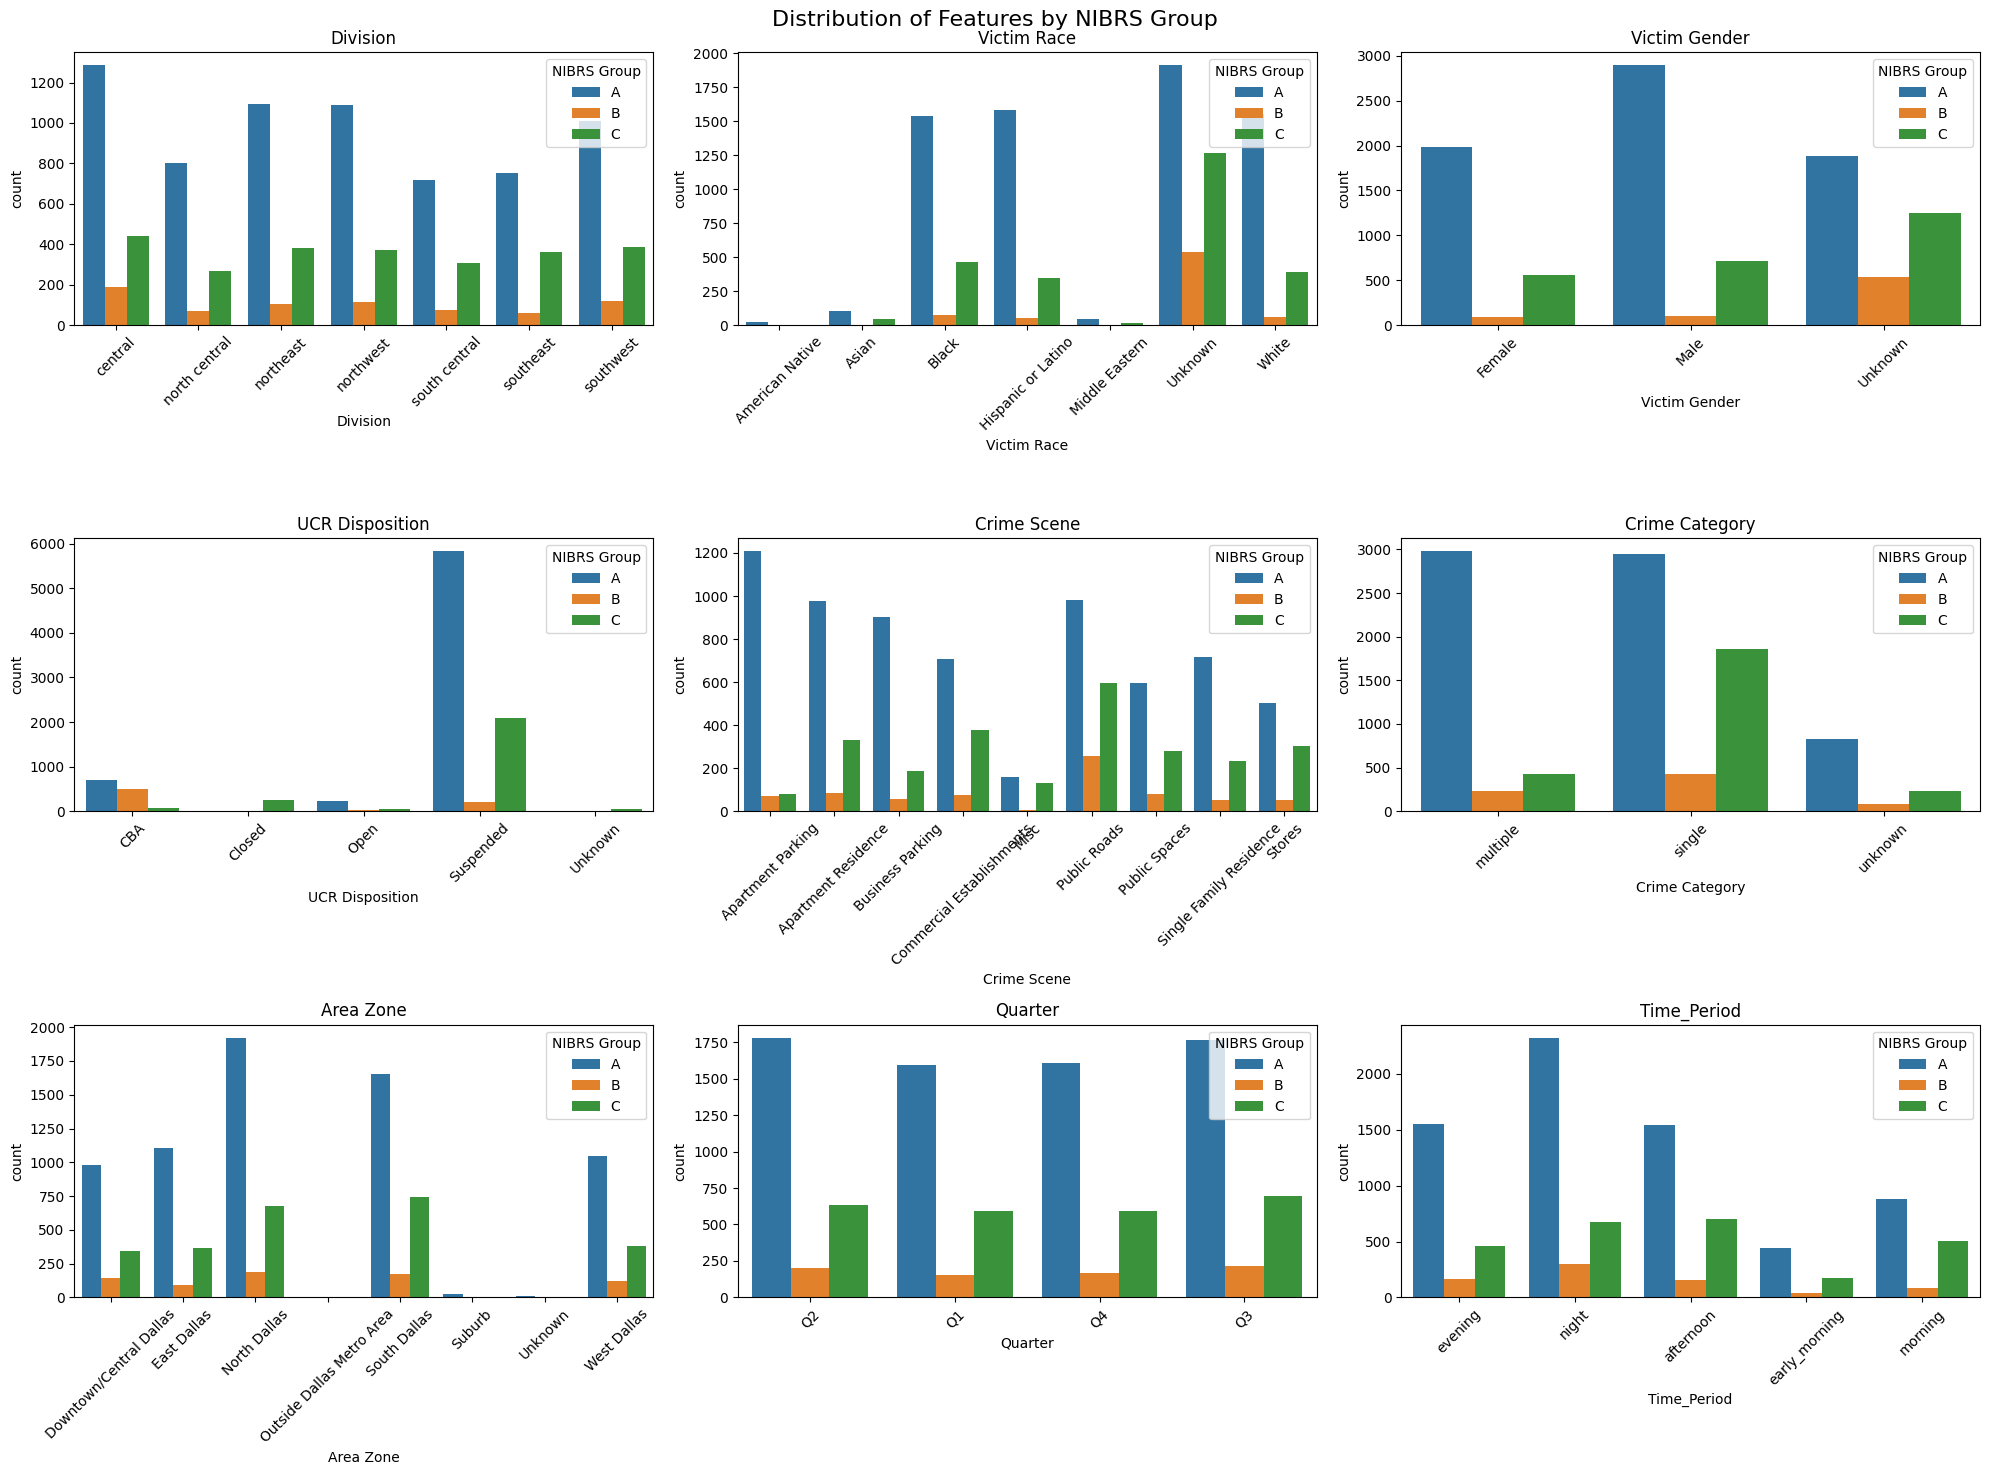

In [ ]:
# Get all columns except the target attribute
features = [col for col in df_pp.columns if col != "NIBRS Group"]

# Calculate number of rows needed
n_rows = math.ceil(len(features) / 3)

# Create the plot
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
fig.suptitle("Distribution of Features by NIBRS Group", fontsize=16)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3

    sns.countplot(data=df_pp, x=feature, hue="NIBRS Group", ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title="NIBRS Group", loc='upper right')

# Remove any empty subplots
for i in range(len(features), n_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

#### 3.5. Encoding the columns, as they are all categorical values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# exclude class
features = df_pp.drop("NIBRS Group", axis=1)
# Apply one-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(features)
# Create a new dataframe with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features.columns),index=df_pp.index) # index=df_pp.index this will keep the original indexing

# Add the class attribute back
encoded_df["NIBRS Group"] = df_pp["NIBRS Group"]
encoded_df.head()

,Division_central,Division_north central,Division_northeast,Division_northwest,Division_south central,Division_southeast,Division_southwest,Victim Race_American Native,Victim Race_Asian,Victim Race_Black,...,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Time_Period_afternoon,Time_Period_early_morning,Time_Period_evening,Time_Period_morning,Time_Period_night,NIBRS Group
1234588,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,B
355678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,A
339328,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,A
1191069,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,C
175324,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A


### 4. Modeling Outliers


In [ ]:
# Variables for Outliers model
# The contamination parameter in both LOF and ISF is set to 0.1, assuming 10% of the data are outliers.
ml_contamination = 0.05
n_neighbors = 10
n_random_seed = 42

#### 4.1 LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Separate features and target
X = encoded_df.drop("NIBRS Group", axis=1)
y = encoded_df["NIBRS Group"]

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=ml_contamination)
lof_labels = lof.fit_predict(X)

# Identify outliers (LOF labels -1 as outliers)
lof_outliers = encoded_df[lof_labels == -1]


#### 4.2 ISF

In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
isf = IsolationForest(contamination=ml_contamination, random_state=n_random_seed)
isf_labels = isf.fit_predict(X)

# Identify outliers (ISF labels -1 as outliers)
isf_outliers = encoded_df[isf_labels == -1]

#### 4.3 Common instances between two methods

##### Method 1: Common instances in both methods

In [ ]:
print(f"\nNumber of outliers by LOF: {len(lof_outliers)}")
print(f"\nNumber of outliers by ISF: {len(isf_outliers)}")
# Find common outliers
common_outliers = encoded_df[(lof_labels == -1) & (isf_labels == -1)]

print(f"\nMethod 1: Number of common outliers: {len(common_outliers)}")
#print("Instances identified as outliers by both LOF and ISF:")
#print(common_outliers)



Number of outliers by LOF: 500

Number of outliers by ISF: 500

Method 1: Number of common outliers: 92


Mapped back the outliers to the data before encoding to see the real data

In [ ]:
# Combine LOF and ISF outlier labels
outlier_mask = (lof_labels == -1) & (isf_labels == -1)

# Create a Series with the original index
outliers = pd.Series(outlier_mask, index=encoded_df.index)

# Identify outliers in the original dataset
original_outliers = df_pp[outliers]

original_outliers.to_csv('Outliers_method1.csv')

print(f"Outliers in the original dataset:{len(original_outliers)}")
original_outliers.head()

Outliers in the original dataset:92


,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Quarter,Time_Period
1192280,northeast,White,Male,Closed,C,Apartment Residence,unknown,Unknown,Q4,night
99793,southeast,Hispanic or Latino,Female,Open,A,Single Family Residence,multiple,South Dallas,Q3,afternoon
151762,south central,Black,Male,Open,A,Single Family Residence,single,South Dallas,Q3,afternoon
343502,southwest,White,Female,CBA,A,Commercial Establishments,single,Downtown/Central Dallas,Q4,morning
530837,northwest,White,Female,CBA,C,Public Roads,multiple,North Dallas,Q4,early_morning


##### Method 2: Using ISF result as input for LOF

In [ ]:
# Separate features and target
#lof_outliers_input = copy.deepcopy(lof_outliers)
isf_outliers_input = copy.deepcopy(isf_outliers)
X_method2 = isf_outliers_input.drop("NIBRS Group", axis=1)
y_method2 = isf_outliers_input["NIBRS Group"]

# Apply Isolation Forest
#isf_m2 = IsolationForest(contamination=ml_contamination, random_state=42)
lof_m2 = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=ml_contamination)
#isf_labels = isf_m2.fit_predict(X_method2)
lof_labels = lof_m2.fit_predict(X_method2)

# Identify outliers (ISF labels -1 as outliers)
#isf_outliers = lof_outliers[isf_labels == -1]
lof_outliers_m2 = isf_outliers[lof_labels == -1]

print(f"\nMethod 2: Number of common outliers: {len(lof_outliers_m2)}")
lof_outliers_m2.head()




Method 2: Number of common outliers: 25


,Division_central,Division_north central,Division_northeast,Division_northwest,Division_south central,Division_southeast,Division_southwest,Victim Race_American Native,Victim Race_Asian,Victim Race_Black,...,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Time_Period_afternoon,Time_Period_early_morning,Time_Period_evening,Time_Period_morning,Time_Period_night,NIBRS Group
1192280,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,C
42281,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,B
1227376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A
39429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,A
1877,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,C


In [ ]:
# Combine LOF and ISF outlier labels
outlier_mask2 = lof_labels == -1

# Create a Series with the original index
outliers2 = pd.Series(outlier_mask2, index=isf_outliers.index)

# Identify outliers in the original dataset
original_outliers2 = df_pp.loc[isf_outliers.index]

original_outliers2.to_csv('Outliers_method2.csv')

print("Outliers in the original dataset:")
original_outliers2

Outliers in the original dataset:


,Division,Victim Race,Victim Gender,UCR Disposition,NIBRS Group,Crime Scene,Crime Category,Area Zone,Quarter,Time_Period
339328,southwest,Hispanic or Latino,Female,CBA,A,Public Spaces,multiple,West Dallas,Q4,night
38843,southeast,White,Female,Closed,C,Public Spaces,single,East Dallas,Q4,morning
443849,northeast,Hispanic or Latino,Male,CBA,A,Public Spaces,multiple,East Dallas,Q3,evening
71233,south central,Asian,Male,Suspended,A,Stores,multiple,South Dallas,Q3,afternoon
138743,southwest,Hispanic or Latino,Male,CBA,B,Stores,multiple,West Dallas,Q2,evening
...,...,...,...,...,...,...,...,...,...,...
1157574,north central,Asian,Female,Suspended,A,Business Parking,multiple,North Dallas,Q2,morning
68050,northwest,Unknown,Unknown,CBA,A,Stores,single,West Dallas,Q3,early_morning
518624,southwest,Black,Female,CBA,A,Public Roads,multiple,West Dallas,Q1,evening
64439,southeast,Hispanic or Latino,Female,CBA,A,Apartment Residence,multiple,South Dallas,Q3,night


### Visualize the outliers


In [ ]:
original_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 1192280 to 132564
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Division         92 non-null     category
 1   Victim Race      92 non-null     category
 2   Victim Gender    92 non-null     category
 3   UCR Disposition  92 non-null     category
 4   NIBRS Group      92 non-null     category
 5   Crime Scene      92 non-null     category
 6   Crime Category   92 non-null     category
 7   Area Zone        92 non-null     category
 8   Quarter          92 non-null     object  
 9   Time_Period      92 non-null     object  
dtypes: category(8), object(2)
memory usage: 4.9+ KB


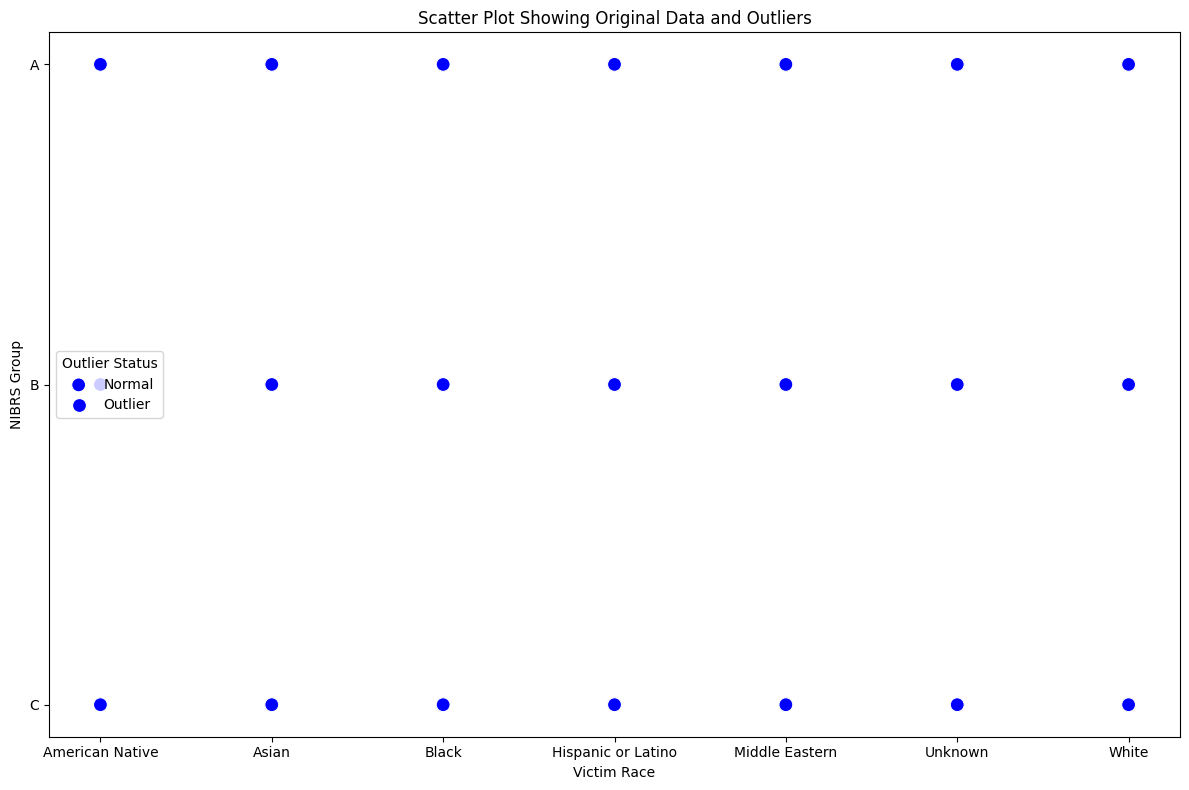

In [ ]:
# Use original_outliers as it's already mapped back to the original dataset
feature1 = 'Victim Race'
feature2 = 'NIBRS Group'

# Create a new column to indicate outlier status
df_pp['is_outlier'] = df_pp.index.isin(original_outliers.index)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pp, x=feature1, y=feature2,
                hue='is_outlier', style='is_outlier',
                palette={False: 'blue', True: 'red'},
                markers={False: 'o', True: 'X'},
                s=100)  # s is the size of the markers

plt.title('Scatter Plot Showing Original Data and Outliers')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Outlier Status', labels=['Normal', 'Outlier'])

plt.tight_layout()
plt.show()


In [ ]:
df_pp.columns

Index(['Division', 'Victim Race', 'Victim Gender', 'UCR Disposition',
       'NIBRS Group', 'Crime Scene', 'Crime Category', 'Area Zone', 'Quarter',
       'Time_Period', 'is_outlier'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 2000x2000 with 0 Axes>

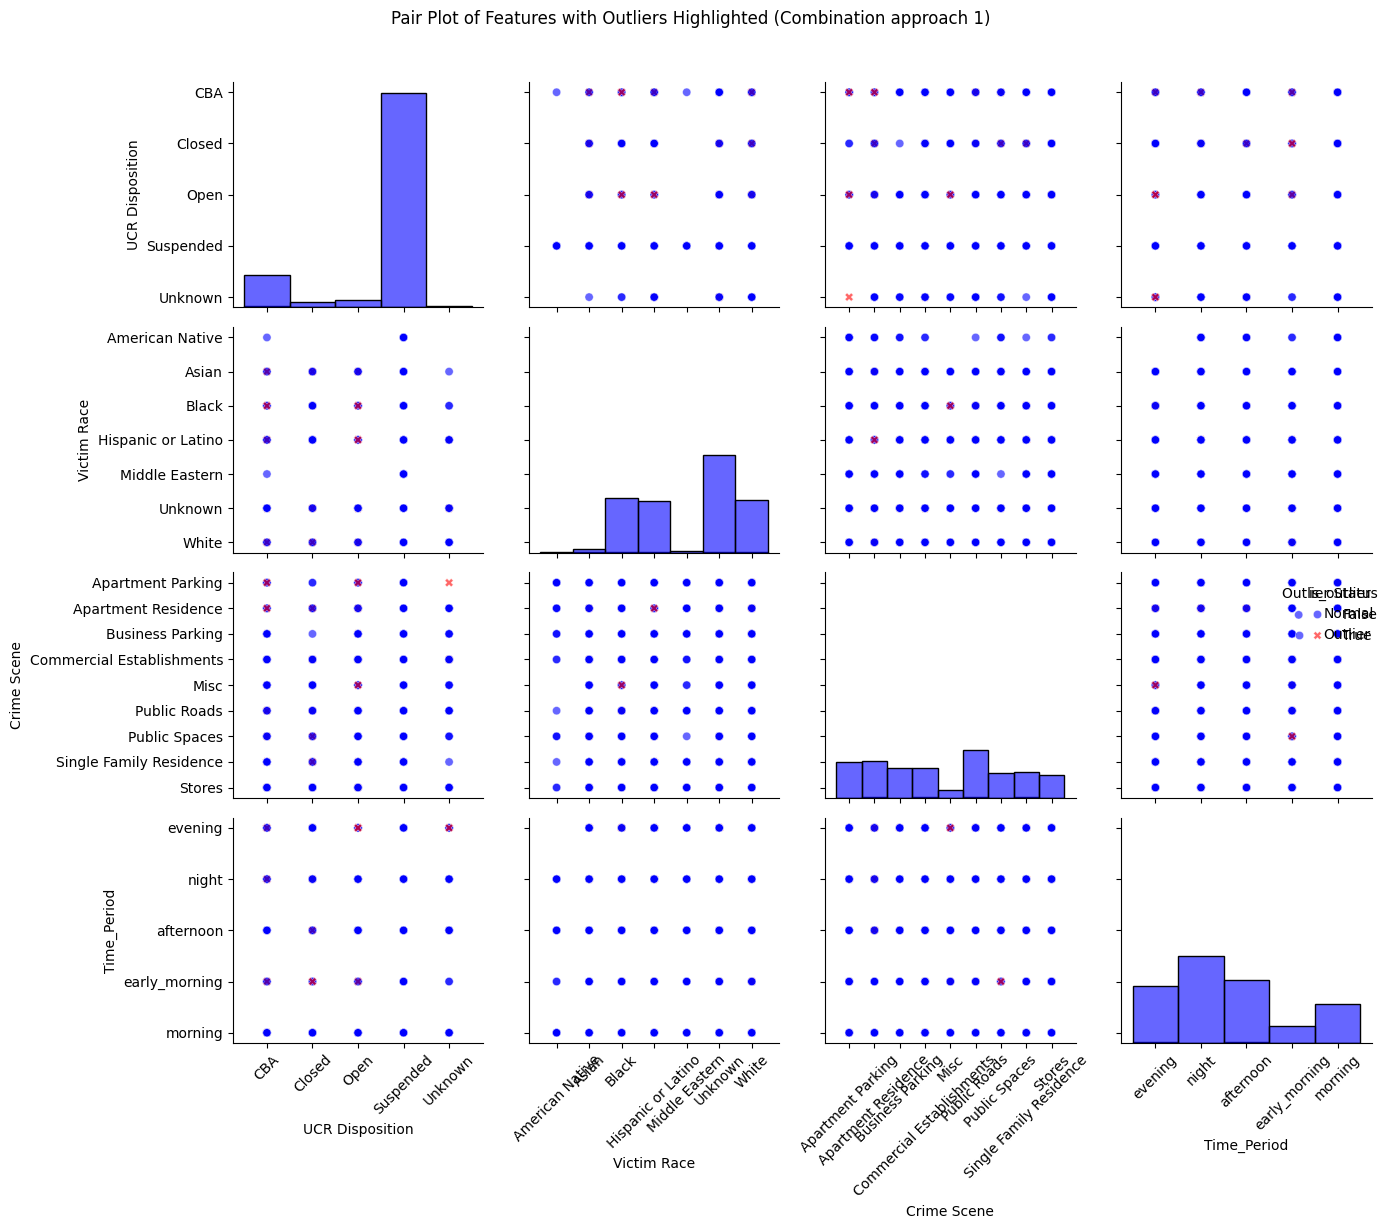

In [ ]:
df_plot = df_pp.copy()

# Add an 'is_outlier' column
df_plot['is_outlier'] = df_plot.index.isin(original_outliers.index)

# Select the features and target variable
features = list(df_pp.columns)  # Adjust this list if you don't want to include all columns

interested_columns = ['UCR Disposition', 'Victim Race', 'Crime Scene', 'Time_Period']
target = 'NIBRS Group'  # Replace with your actual target variable name

# Create the pair plot
plt.figure(figsize=(20, 20))
g = sns.pairplot(df_plot,
                 vars=interested_columns,
                 hue='is_outlier',
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6},
                 diag_kws={'alpha': 0.6},
                 palette={False: 'blue', True: 'red'},
                 markers={False: 'o', True: 'X'},
                 height=3)

# Customize the plot
g.fig.suptitle("Pair Plot of Features with Outliers Highlighted (Combination approach 1)", y=1.02)
g.add_legend(title='Outlier Status', labels=['Normal', 'Outlier'])

g.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 2000x2000 with 0 Axes>

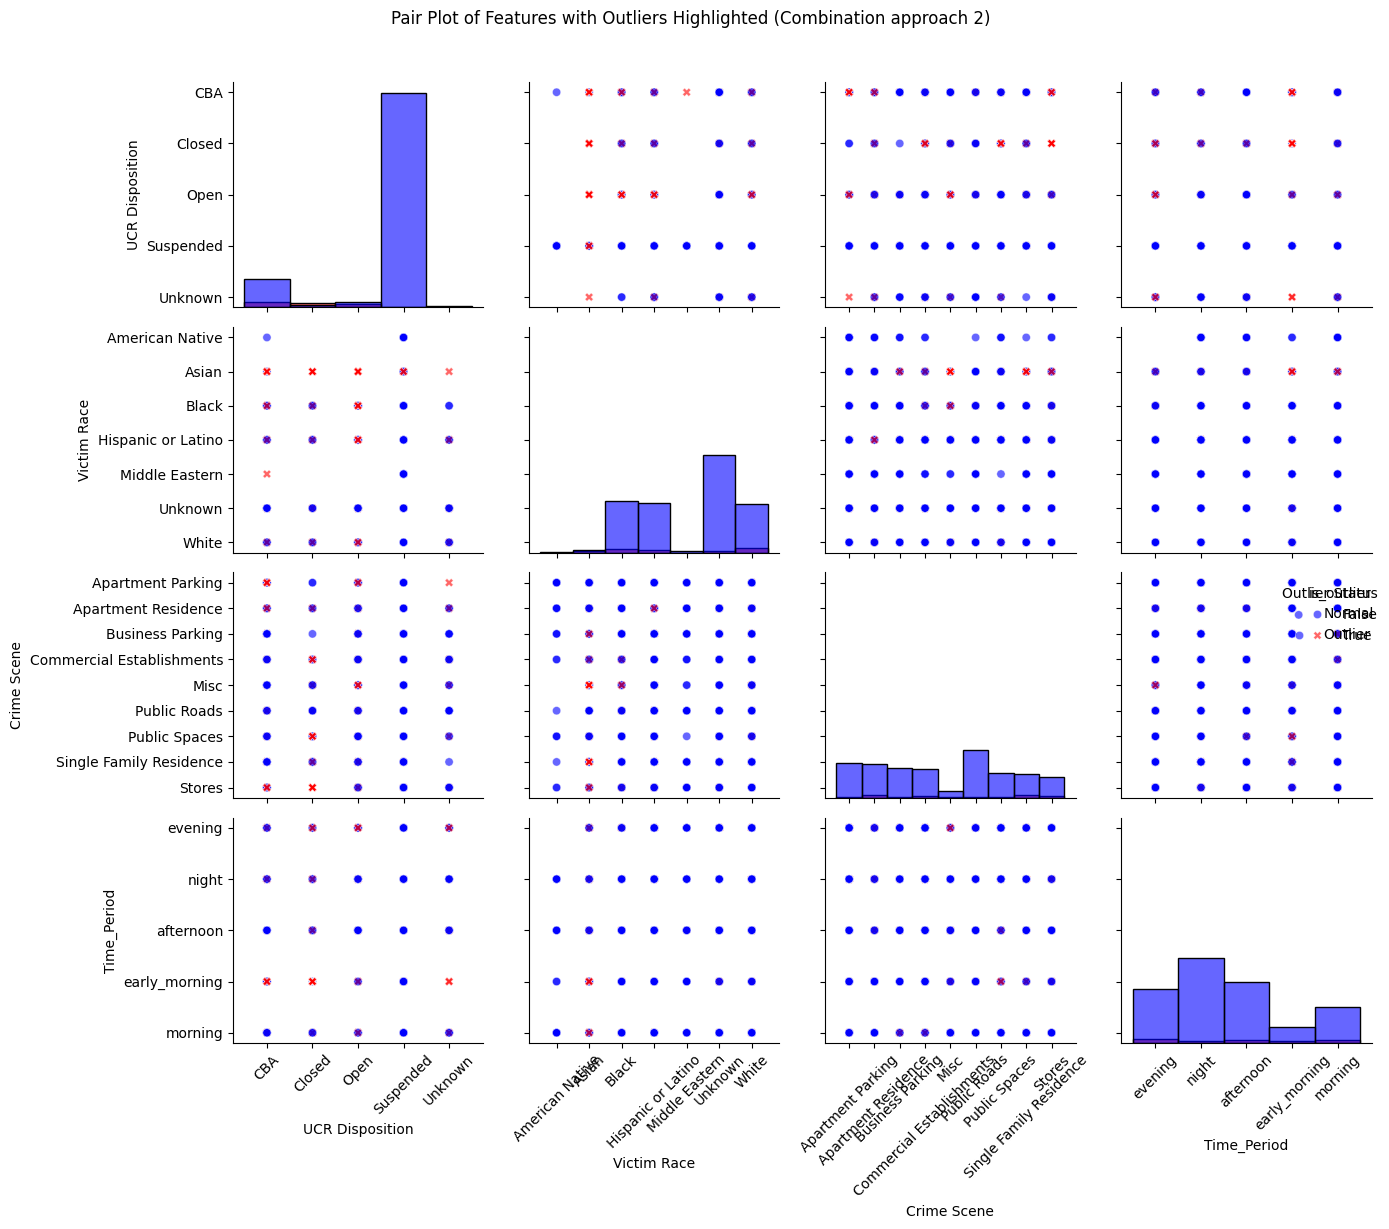

In [ ]:
df_plot = df_pp.copy()

# Add an 'is_outlier' column
df_plot['is_outlier'] = df_plot.index.isin(original_outliers2.index)

# Select the features and target variable
features = list(df_pp.columns)  # Adjust this list if you don't want to include all columns

interested_columns = ['UCR Disposition', 'Victim Race', 'Crime Scene', 'Time_Period']
target = 'NIBRS Group'  # Replace with your actual target variable name

# Create the pair plot
plt.figure(figsize=(20, 20))
g = sns.pairplot(df_plot,
                 vars=interested_columns,
                 hue='is_outlier',
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6},
                 diag_kws={'alpha': 0.6},
                 palette={False: 'blue', True: 'red'},
                 markers={False: 'o', True: 'X'},
                 height=3)

# Customize the plot
g.fig.suptitle("Pair Plot of Features with Outliers Highlighted (Combination approach 2)", y=1.02)
g.add_legend(title='Outlier Status', labels=['Normal', 'Outlier'])

g.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 5. Another approach to find outliers

In [ ]:
df_pp_2 = copy.deepcopy(df_ready)
print(f'Number of instances from the prepared data: {len(df_pp_2)}')

Number of instances from the prepared data: 10000


### Prepare data

- Only consider the Crime in 2022 and focus on the number of incidents in a day


In [ ]:
# Get only the date and total case for each NIBRS group
# Convert 'Datetime of Occurrence' to datetime type if it's not already
df_pp_2['Datetime of Occurrence'] = pd.to_datetime(df_pp_2['Datetime of Occurrence'])

# Create a new DataFrame with only the date and count of crimes
result_df = df_pp_2.groupby(df_pp_2['Datetime of Occurrence'].dt.date).size().reset_index(name='Total crime case')
result_df['Datetime of Occurrence'] = pd.to_datetime(result_df['Datetime of Occurrence'])
result_df = result_df[result_df['Datetime of Occurrence'].dt.year == 2022]
result_df = result_df[result_df['Total crime case'] > 1]
# Rename the date column
result_df = result_df.rename(columns={'Datetime of Occurrence': 'Date'})

# Sort by date if needed
result_df = result_df.sort_values('Date')
result_df

,Date,Total crime case
120,2022-01-01,37
121,2022-01-02,17
122,2022-01-03,25
123,2022-01-04,32
124,2022-01-05,34
...,...,...
480,2022-12-27,19
481,2022-12-28,21
482,2022-12-29,15
483,2022-12-30,24


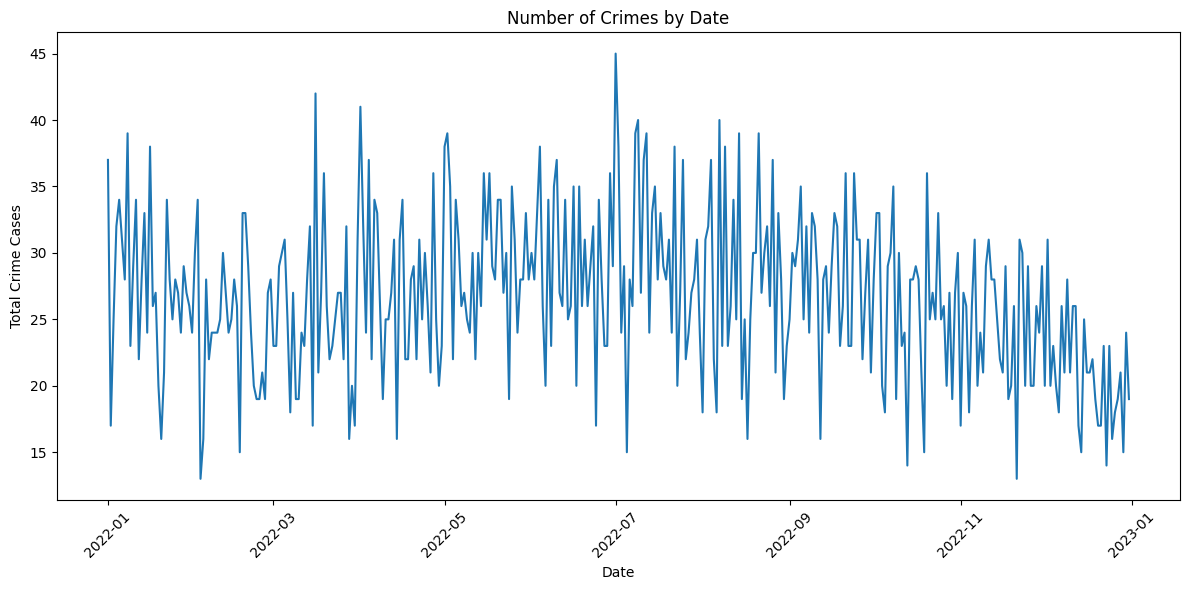

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(result_df['Date'], result_df['Total crime case'])
plt.title('Number of Crimes by Date')
plt.xlabel('Date')
plt.ylabel('Total Crime Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prepare data for finding outlier

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# Convert Date column to numeric
result_df['Date'] = pd.to_datetime(result_df['Date'])
result_df['DateNumeric'] = result_df['Date'].astype(int) / 10**9

X = result_df[['DateNumeric', 'Total crime case']]

result_df.to_csv('Outliers_data.csv')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Variables for Outliers model
# The contamination parameter in both LOF and ISF is set to 0.1, assuming 10% of the data are outliers.
ml_contamination = 0.05
n_neighbors = 10
n_random_seed = 42

In [ ]:
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=ml_contamination)
isf = IsolationForest(contamination=ml_contamination, random_state=n_random_seed)

lof_labels = lof.fit_predict(X_scaled)
isf_labels = isf.fit_predict(X_scaled)

y_pred = lof.fit_predict(X_scaled)
y_pred_isf = isf.fit_predict(X_scaled)


In [ ]:
print(f'Numer of outliers by LOF: {len(result_df[y_pred == -1])}')
print(f'Numer of outliers by ISF: {len(result_df[y_pred_isf == -1])}')

Numer of outliers by LOF: 19
Numer of outliers by ISF: 19


In [ ]:
outlier_mask = y_pred == -1
result_df['is_outlier'] = outlier_mask
outliers = result_df[result_df['is_outlier']]
outliers.to_csv('Outliers_method3.csv')
outliers.head()

,Date,Total crime case,DateNumeric,is_outlier
121,2022-01-02,17,1.641082e+09,True
125,2022-01-06,31,1.641427e+09,True
127,2022-01-08,39,1.641600e+09,True
131,2022-01-12,22,1.641946e+09,True
139,2022-01-20,16,1.642637e+09,True


## Visualize outliers

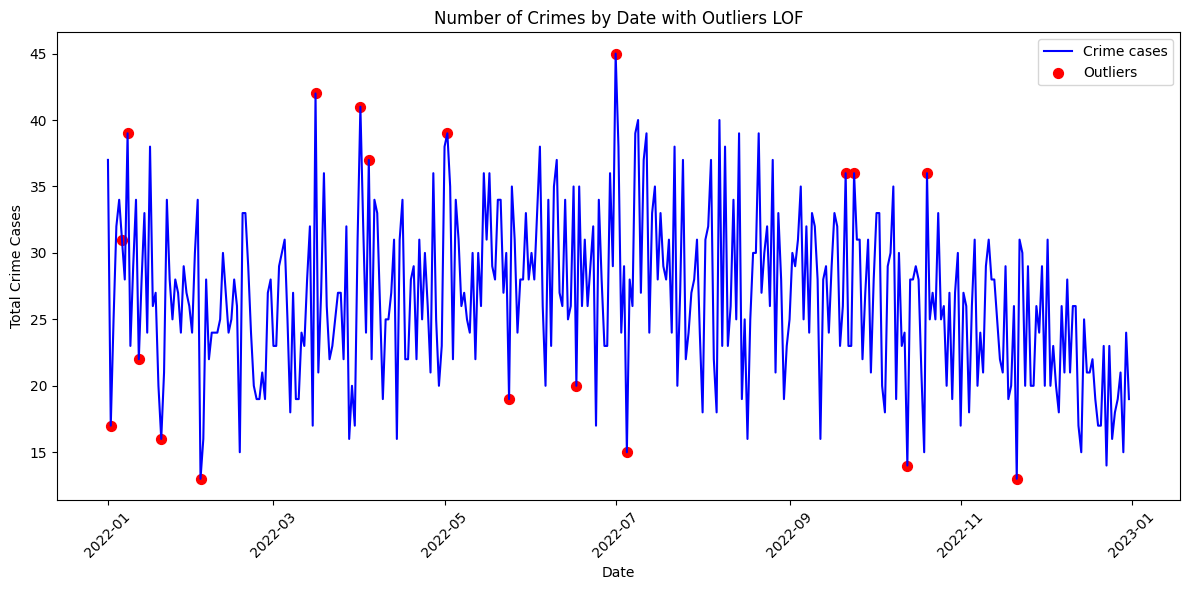

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the line for all data points
plt.plot(result_df['Date'], result_df['Total crime case'], color='blue', label='Crime cases')

# Highlight the outliers
outliers = result_df[result_df['is_outlier']]
plt.scatter(outliers['Date'], outliers['Total crime case'], color='red', s=50, label='Outliers')

plt.title('Number of Crimes by Date with Outliers LOF')
plt.xlabel('Date')
plt.ylabel('Total Crime Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
outlier_mask_isf = y_pred_isf == -1
result_df['is_outlier_isf'] = outlier_mask_isf
outliers_isf = result_df[result_df['is_outlier_isf']]
outliers_isf.to_csv('Outliers_method4.csv')
outliers_isf.head()

,Date,Total crime case,DateNumeric,is_outlier,is_outlier_isf
120,2022-01-01,37,1.640995e+09,False,True
121,2022-01-02,17,1.641082e+09,True,True
123,2022-01-04,32,1.641254e+09,False,True
127,2022-01-08,39,1.641600e+09,True,True
135,2022-01-16,38,1.642291e+09,False,True


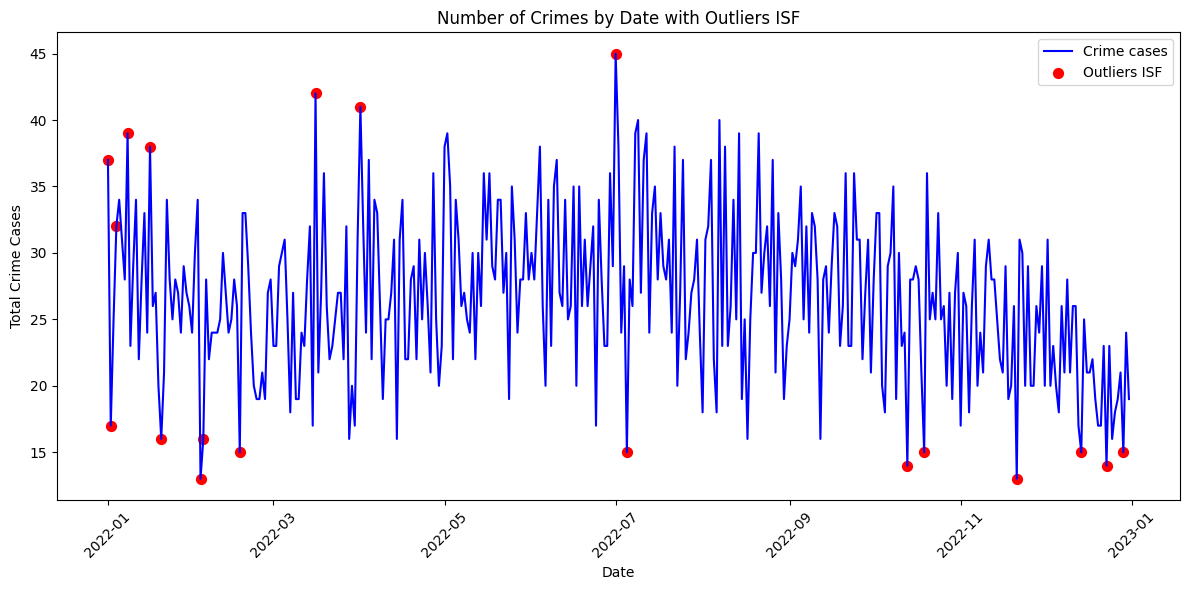

In [ ]:
# ISF
plt.figure(figsize=(12, 6))

# Plot the line for all data points
plt.plot(result_df['Date'], result_df['Total crime case'], color='blue', label='Crime cases')

# Highlight the outliers
plt.scatter(outliers_isf['Date'], outliers_isf['Total crime case'], color='red', s=50, label='Outliers ISF')

plt.title('Number of Crimes by Date with Outliers ISF')
plt.xlabel('Date')
plt.ylabel('Total Crime Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Common outliers from 2 methods

In [ ]:
common_outliers = outliers_isf[(outliers_isf['is_outlier'] == True) & (outliers_isf['is_outlier_isf'] == True)]
common_outliers.to_csv('Outliers_common.csv')
common_outliers.head()

,Date,Total crime case,DateNumeric,is_outlier,is_outlier_isf
121,2022-01-02,17,1.641082e+09,True,True
127,2022-01-08,39,1.641600e+09,True,True
139,2022-01-20,16,1.642637e+09,True,True
153,2022-02-03,13,1.643846e+09,True,True
194,2022-03-16,42,1.647389e+09,True,True


In [ ]:
print(f'Common outliers using Time Series Anomoly detection: {len(common_outliers)}')

Common outliers using Time Series Anomoly detection: 10


In [ ]:
# Create a new column in result_df to indicate common outliers
result_df['is_common_outlier'] = False
# Set the 'is_common_outlier' flag to True for the common outliers
result_df.loc[common_outliers.index, 'is_common_outlier'] = True

# Verify the mapping
common_outliers = result_df[result_df['is_common_outlier'] == True]

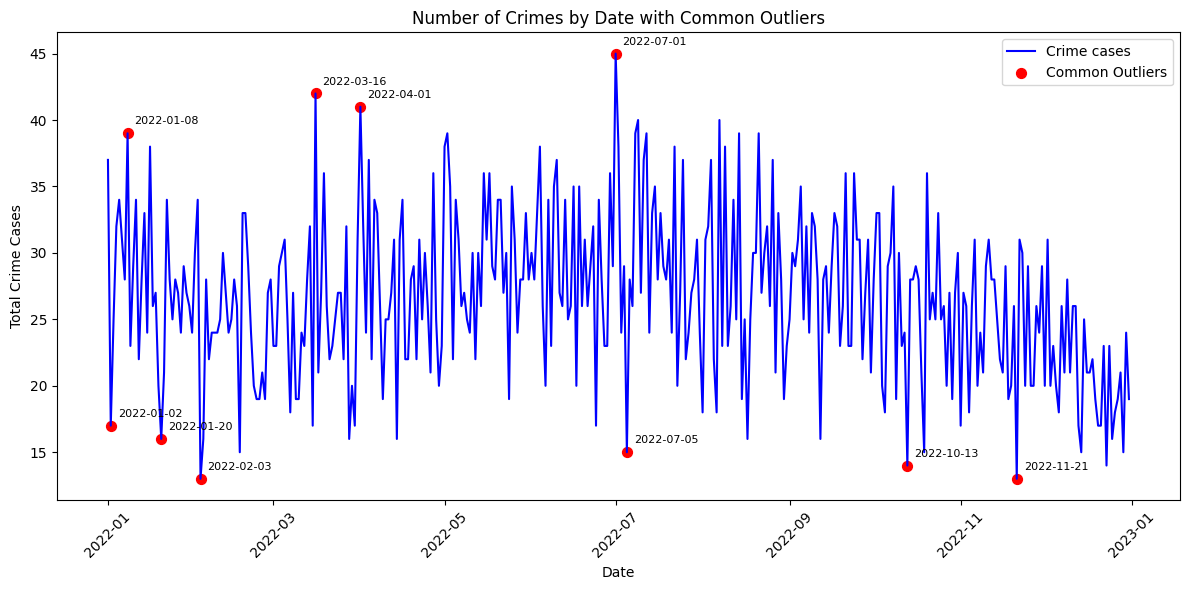

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))

# Plot the line for all data points
plt.plot(result_df['Date'], result_df['Total crime case'], color='blue', label='Crime cases')

# Highlight the outliers
plt.scatter(common_outliers['Date'], common_outliers['Total crime case'], color='red', s=50, label='Common Outliers')
# Add date labels to outlier points
for idx, row in common_outliers.iterrows():
    plt.annotate(row['Date'].strftime('%Y-%m-%d'),
                 (mdates.date2num(row['Date']), row['Total crime case']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8, rotation=0, ha='left', va='bottom')
plt.title('Number of Crimes by Date with Common Outliers')
plt.xlabel('Date')
plt.ylabel('Total Crime Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The outliers indicates the increasing of incidents happen in holidays or there are events in these period of time. For example:

- New Year period: 1/2/2022 and 1/8/2022 fall within the first week of January, which is typically a time for New Year celebrations and events
- Winter events: The dates in January and February (1/2/2022, 1/8/2022, 1/20/2022, 2/3/2022) could be related to winter activities or events in Dallas. The city offers indoor entertainment options during this time, such as visiting museums or attending sports games
- Spring break: The date 3/16/2022 falls in mid-March, which could be during or near spring break for some schools.
- Summer events: 7/1/2022 and 7/5/2022 are around the Independence Day holiday, which often features celebrations and events.
- Fall and winter holidays: 10/13/2022 is in October (possibly related to Halloween events), and 11/21/2022 is near Thanksgiving.
- Sports events: Some of these dates might coincide with Dallas Mavericks (basketball) or Dallas Stars (hockey) games at the American Airlines Center
-